In [1]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import seaborn as sns

from n0_config_params import *
from n0bis_config_analysis_functions import *

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Load data

In [2]:
os.chdir(os.path.join(path_data, 'psychometric'))
os.listdir()

['OLFADYS_mdp.xlsx',
 'OLFADYS_odor_profiles.xlsx',
 'OLFADYS_questionnaire.xlsx',
 'OLFADYS_correspondance_questions.xlsx',
 'OLFADYS_odor_choice.xlsx']

In [3]:
df_mdp = pd.read_excel('OLFADYS_mdp.xlsx')
df_q = pd.read_excel('OLFADYS_questionnaire.xlsx')
correspondance_question = pd.read_excel('OLFADYS_correspondance_questions.xlsx')
df_odor_profile = pd.read_excel('OLFADYS_odor_profiles.xlsx')
df_odor_choice = pd.read_excel('OLFADYS_odor_choice.xlsx')

In [ ]:
df_mdp

,sujet,session,cond,question,value
0,PD01,o,MECA,A1,8
1,PD01,o,MECA,QS_1,7
2,PD01,o,MECA,QS_2,7
3,PD01,o,MECA,QS_3,6
4,PD01,o,MECA,QS_4,5
...,...,...,...,...,...
2371,MA33,-,CO2,A2_1,0
2372,MA33,-,CO2,A2_2,4
2373,MA33,-,CO2,A2_3,3
2374,MA33,-,CO2,A2_4,0


In [ ]:
df_mdp.groupby(['cond', 'question']).mean().reset_index()

,cond,question,value
0,CO2,A1,8.070707
1,CO2,A2_1,0.383838
2,CO2,A2_2,3.515152
3,CO2,A2_3,1.888889
4,CO2,A2_4,0.707071
5,CO2,A2_5,2.353535
6,CO2,QS_1,7.464646
7,CO2,QS_2,7.959596
8,CO2,QS_3,4.484848
9,CO2,QS_4,7.101010


# odor analysis

In [ ]:
df_odor_choice

,sujet,session,odor,raw_val,scale,value
0,PD01,odor_+,6,10.1,12.7,79.527559
1,PD01,odor_-,11,4.2,12.7,33.070866
2,MJ02,odor_+,6,8.7,12.7,68.503937
3,MJ02,odor_-,11,3.5,12.7,27.559055
4,VN03,odor_+,13,7.5,12.7,59.055118
...,...,...,...,...,...,...
61,HJ31,odor_-,11,1.6,12.7,12.598425
62,CM32,odor_+,9,9.6,12.6,76.190476
63,CM32,odor_-,11,5.4,12.6,42.857143
64,MA33,odor_+,6,10.5,12.6,83.333333


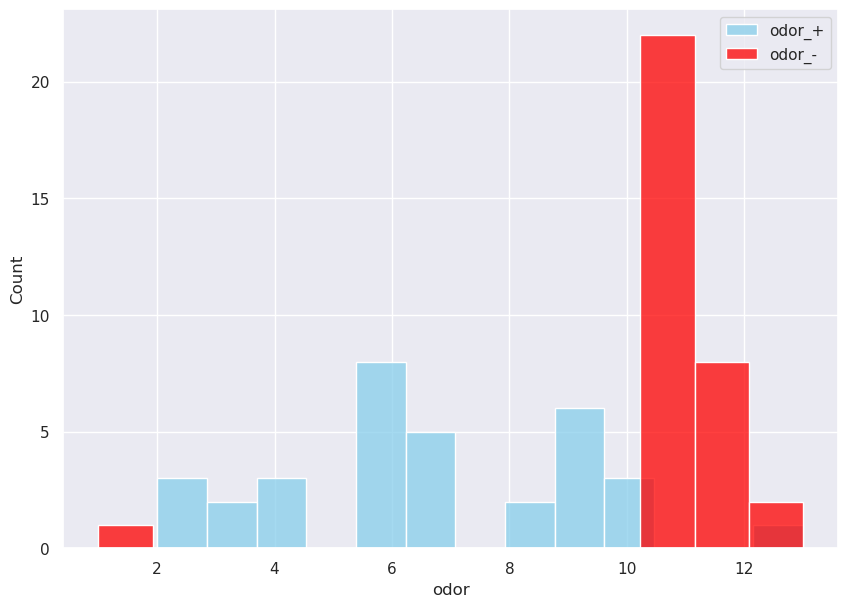

In [ ]:
df_plot = df_odor_choice[(df_odor_choice['session'] == 'odor_+').values]
sns.histplot(data=df_plot, x="odor", label='odor_+', color="skyblue", bins=13)
df_plot = df_odor_choice[(df_odor_choice['session'] == 'odor_-').values]
sns.histplot(data=df_plot, x="odor", label='odor_-', color="red", bins=13)

plt.legend()

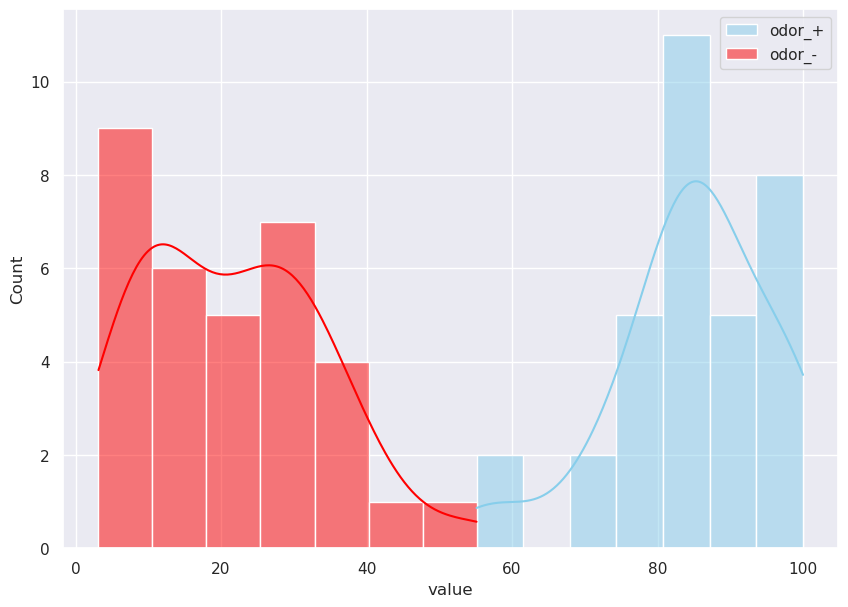

In [ ]:
df_plot = df_odor_choice[(df_odor_choice['session'] == 'odor_+').values]
sns.histplot(data=df_plot, x="value", label='odor_+', color="skyblue", kde=True)
df_plot = df_odor_choice[(df_odor_choice['session'] == 'odor_-').values]
sns.histplot(data=df_plot, x="value", label='odor_-', color="red", kde=True)

plt.legend()


In [ ]:
df_odor_choice

,sujet,session,odor,raw_val,scale,value
0,PD01,odor_+,6,10.1,12.7,79.527559
1,PD01,odor_-,11,4.2,12.7,33.070866
2,MJ02,odor_+,6,8.7,12.7,68.503937
3,MJ02,odor_-,11,3.5,12.7,27.559055
4,VN03,odor_+,13,7.5,12.7,59.055118
...,...,...,...,...,...,...
61,HJ31,odor_-,11,1.6,12.7,12.598425
62,CM32,odor_+,9,9.6,12.6,76.190476
63,CM32,odor_-,11,5.4,12.6,42.857143
64,MA33,odor_+,6,10.5,12.6,83.333333


In [ ]:
val = np.zeros((df_odor_choice['sujet'].unique().shape[0], 2), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_odor_choice['sujet'].unique()):
    df_i = df_odor_choice.query(f"sujet == '{sujet}'")
    diff_i = df_i[df_i['session'] == 'odor_+']['value'].values[0] - df_i[df_i['session'] == 'odor_-']['value'].values[0]
    val[i, :] = np.array([sujet, diff_i])
    i += 1

In [ ]:
df_diff = pd.DataFrame(val, columns=['sujet', 'value'])
df_diff['value'] = df_diff['value'].astype(np.float64) 
df_diff

,sujet,value
0,PD01,46.456693
1,MJ02,40.944882
2,VN03,27.559055
3,GB04,78.740157
4,LV05,33.858268
5,EF06,62.204724
6,PB07,80.314961
7,DM08,78.571429
8,TA09,75.396825
9,BH10,41.269841


<AxesSubplot:xlabel='value', ylabel='Count'>

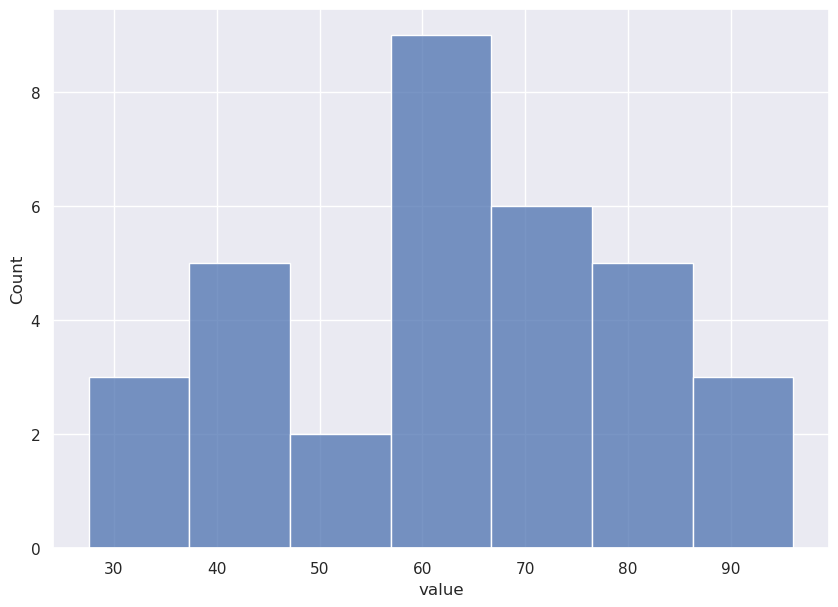

In [ ]:
sns.histplot(data=df_diff, x="value")

In [ ]:
sujet_sel_diff = df_diff.query("value >= 60")['sujet'].values
sujet_sel_diff

array(['GB04', 'EF06', 'PB07', 'DM08', 'TA09', 'FA11', 'BD12', 'FP13',
       'MD14', 'LG15', 'GM16', 'JR17', 'SE18', 'TY20', 'ZV21', 'TJ24',
       'MN26', 'NT28', 'SC29', 'HJ31', 'MA33'], dtype=object)

In [ ]:
df_odor_profile

,sujet,question,odor,raw_val,scale,value
0,PD01,appreciation,11,0.0,15.0,0.000000
1,PD01,appreciation,13,7.3,15.0,48.666667
2,PD01,appreciation,12,8.0,15.0,53.333333
3,PD01,appreciation,4,11.0,15.0,73.333333
4,PD01,appreciation,5,13.1,15.0,87.333333
...,...,...,...,...,...,...
985,MA33,evocation,13,0.0,12.5,0.000000
986,MA33,evocation,6,10.2,12.5,81.600000
987,MA33,evocation,12,11.3,12.5,90.400000
988,MA33,evocation,7,12.5,12.5,100.000000


In [ ]:
for sujet_i, sujet in enumerate(df_odor_profile['sujet'].unique()):
    odor_p = df_odor_choice.query(f"sujet == '{sujet}' & session == 'odor_+'")['odor'].values[0]
    odor_n = df_odor_choice.query(f"sujet == '{sujet}' & session == 'odor_-'")['odor'].values[0]
    odor_sel = [odor_p, odor_n]
    if sujet_i == 0:
        df_odor_profile_filtered = df_odor_profile.query(f"sujet == '{sujet}' & odor in {odor_sel}")
        df_odor_profile_filtered_p = df_odor_profile.query(f"sujet == '{sujet}' & odor == {odor_p}")
    else:
        df_i = df_odor_profile.query(f"sujet == '{sujet}' & odor in {odor_sel}")    
        df_i_p = df_odor_profile.query(f"sujet == '{sujet}' & odor == {odor_p}")    
        df_odor_profile_filtered = pd.concat([df_odor_profile_filtered, df_i], axis=0)
        df_odor_profile_filtered_p = pd.concat([df_odor_profile_filtered_p, df_i_p], axis=0)
df_odor_profile_filtered

,sujet,question,odor,raw_val,scale,value
0,PD01,appreciation,11,0.0,15.0,0.000000
5,PD01,appreciation,6,14.6,15.0,97.333333
8,PD01,eveil,6,9.9,15.0,66.000000
11,PD01,eveil,11,14.8,15.0,98.666667
12,PD01,familiarite,11,4.7,15.0,31.333333
...,...,...,...,...,...,...
976,MA33,familiarite,6,12.5,12.5,100.000000
978,MA33,intensite,6,5.4,12.5,43.200000
983,MA33,intensite,11,12.5,12.5,100.000000
984,MA33,evocation,11,0.0,12.5,0.000000


(0.0, 100.0)

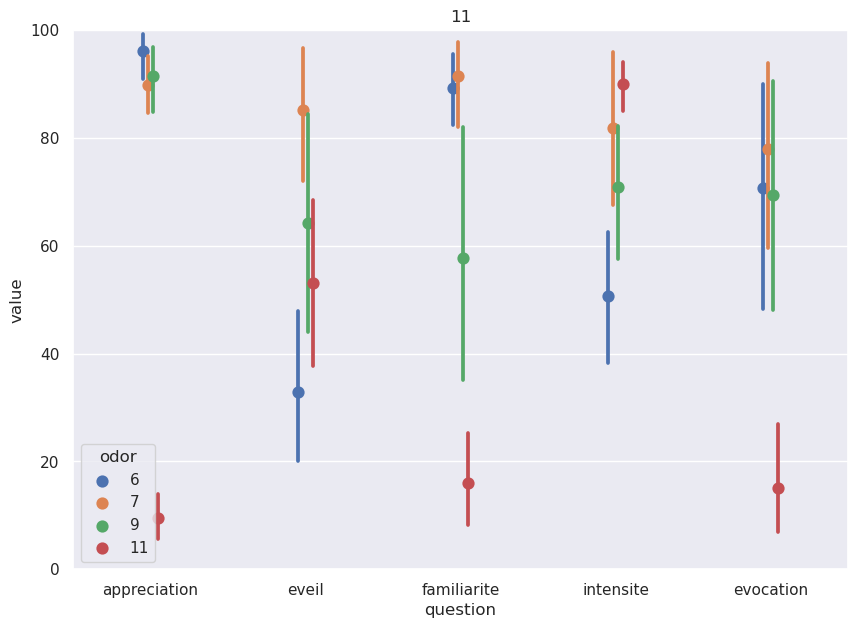

In [ ]:
odor_sel = [6, 7, 9, 11]
df_plot = df_odor_profile_filtered.query(f"odor in {odor_sel}")
sns.pointplot(data=df_plot, x="question", y="value", hue="odor", errorbar='sd', linestyles='none', dodge=True).set(title=odor)
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

In [ ]:
df_odor_profile_filtered_p

,sujet,question,odor,raw_val,scale,value
5,PD01,appreciation,6,14.6,15.0,97.333333
8,PD01,eveil,6,9.9,15.0,66.000000
17,PD01,familiarite,6,14.2,15.0,94.666667
18,PD01,intensite,6,7.1,15.0,47.333333
29,PD01,evocation,6,14.1,15.0,94.000000
...,...,...,...,...,...,...
965,MA33,appreciation,6,12.5,12.5,100.000000
967,MA33,eveil,6,1.5,12.5,12.000000
976,MA33,familiarite,6,12.5,12.5,100.000000
978,MA33,intensite,6,5.4,12.5,43.200000


<AxesSubplot:xlabel='value', ylabel='Count'>

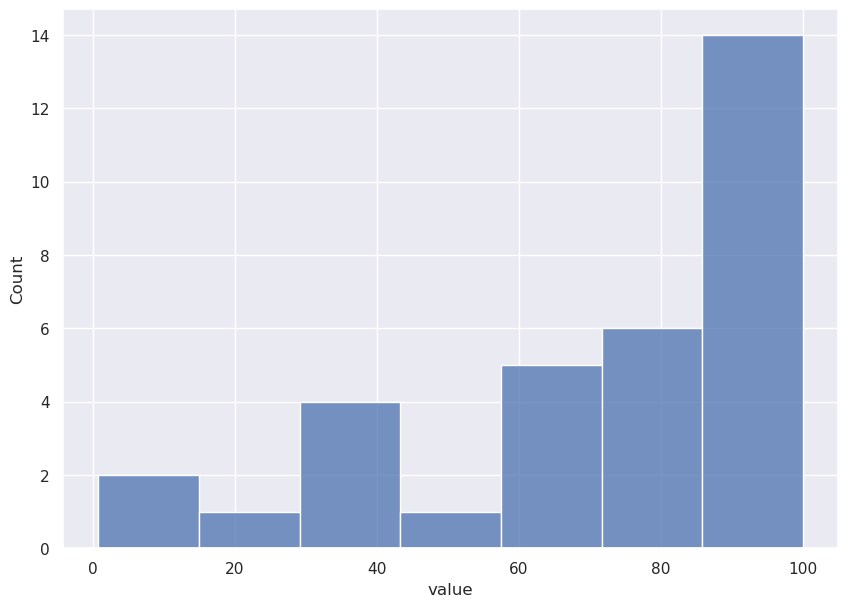

In [ ]:
df_plot = df_odor_profile_filtered_p.query(f"question == 'evocation'")
sns.histplot(data=df_plot, x="value")

In [ ]:
sujet_sel_evoc = df_odor_profile_filtered_p.query(f"question == 'evocation' & value >= 60")['sujet'].unique()

In [4]:
sujet_sel_best = []
for sujet in sujet_sel_diff:
    if sujet in sujet_sel_evoc:
        sujet_sel_best.append(sujet)
sujet_sel_best = np.array(sujet_sel_best)
sujet_sel_best

NameError: name 'sujet_sel_diff' is not defined

# mdp analysis

(0.0, 10.0)

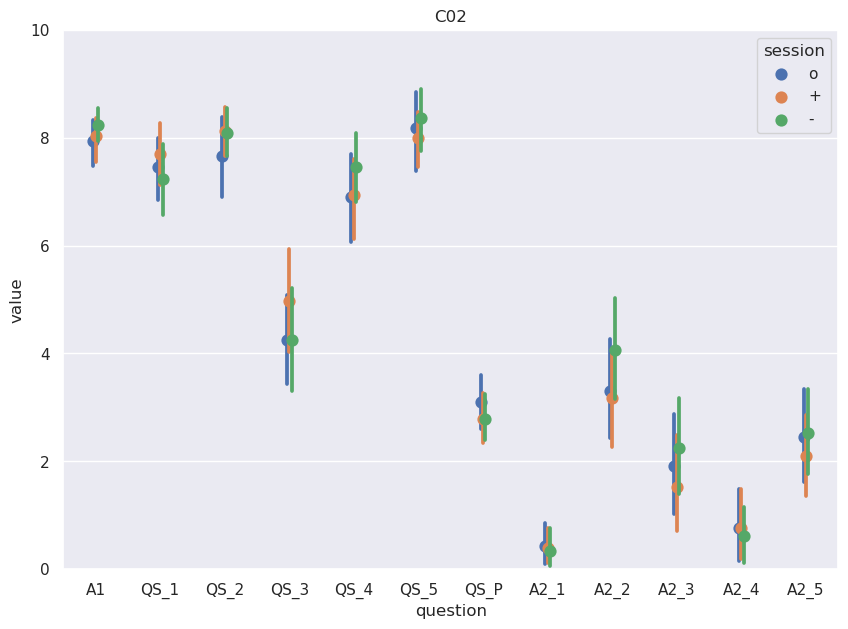

In [ ]:
df_plot = df_mdp[df_mdp['cond'] == 'CO2']
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='C02')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

(0.0, 10.0)

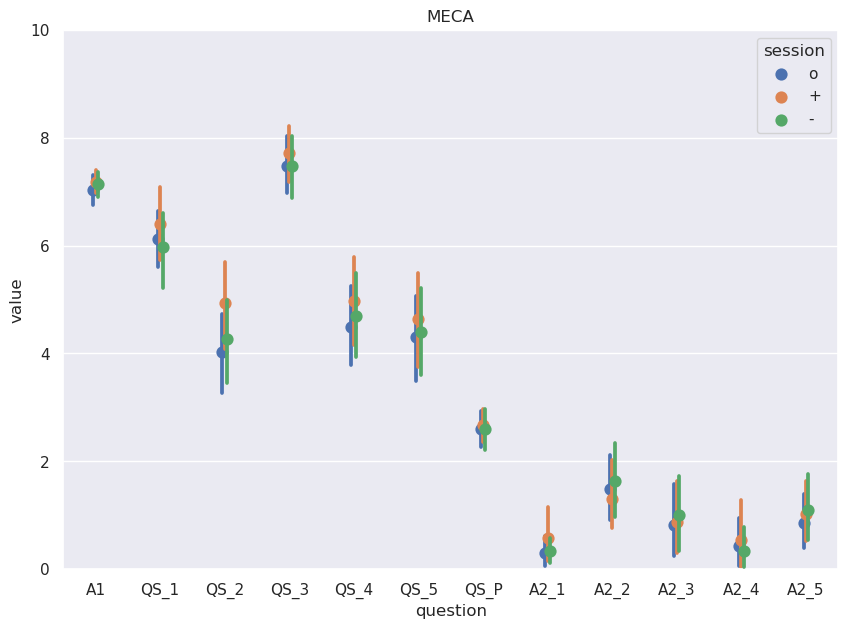

In [ ]:
df_plot = df_mdp[df_mdp['cond'] == 'MECA']
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

In [ ]:
val = np.zeros((df_mdp['sujet'].unique().shape[0]*df_mdp['session'].unique().shape[0]*df_mdp['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_mdp['sujet'].unique()):
    for session_i, session in enumerate(df_mdp['session'].unique()):
        for cond_i, cond in enumerate(df_mdp['cond'].unique()):
            df_i = df_mdp.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_A2 = df_i[df_i['question'].isin(['A2_1', 'A2_2', 'A2_3', 'A2_4', 'A2_5'])]['value'].sum()
            val[i, :] = np.array([sujet, session, cond, val_A2])
            i += 1

In [ ]:
df_A2 = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'value'])
df_A2['value'] = df_A2['value'].astype(np.float64) 
df_A2

,sujet,session,cond,value
0,PD01,o,MECA,26.0
1,PD01,o,CO2,34.0
2,PD01,+,MECA,40.0
3,PD01,+,CO2,32.0
4,PD01,-,MECA,27.0
...,...,...,...,...
193,MA33,o,CO2,21.0
194,MA33,+,MECA,2.0
195,MA33,+,CO2,7.0
196,MA33,-,MECA,1.0


(0.0, 50.0)

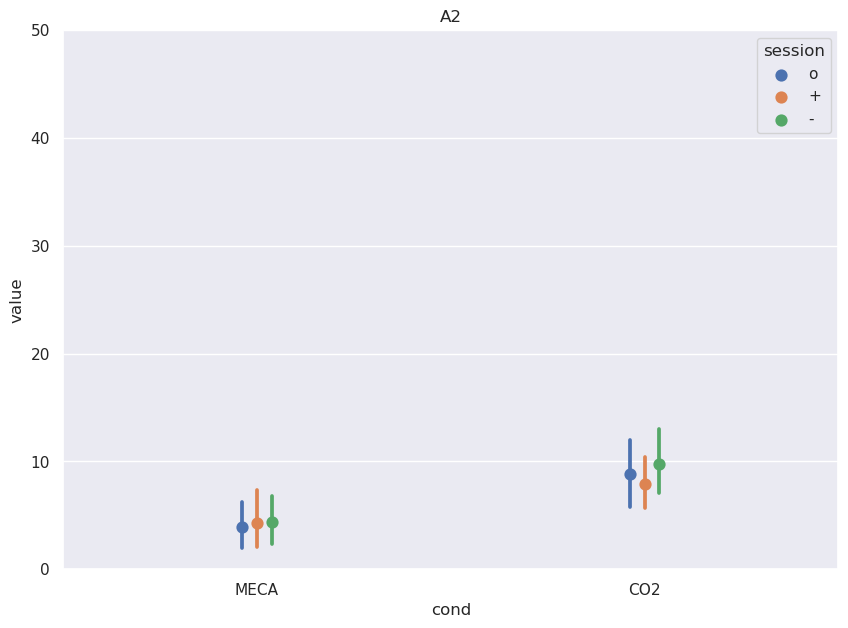

In [ ]:
df_plot = df_A2[df_A2['cond'] == 'CO2']
sns.pointplot(data=df_A2, x="cond", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='A2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 50)

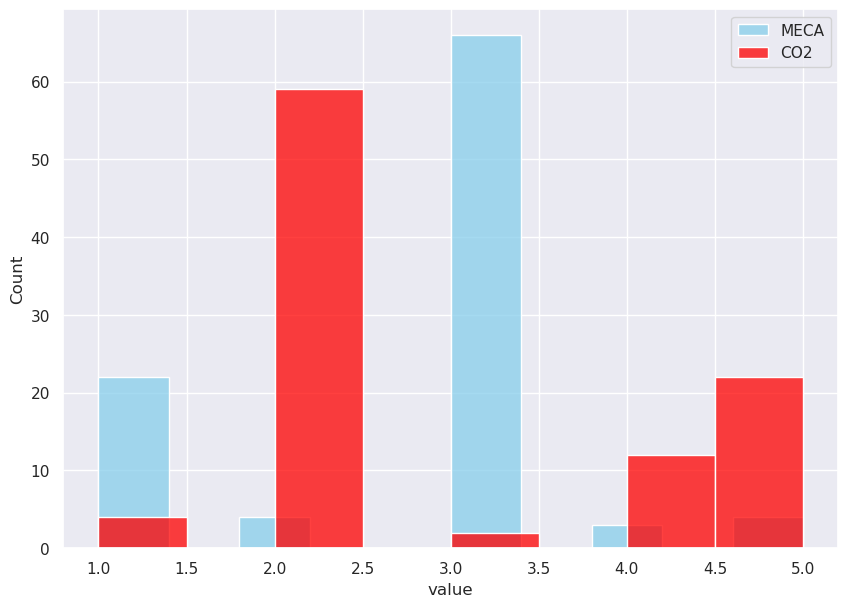

In [ ]:
df_plot = df_mdp[(df_mdp['cond'] == 'MECA').values & (df_mdp['question'] == 'QS_P').values]
sns.histplot(data=df_plot, x="value", label='MECA', color="skyblue")
df_plot = df_mdp[(df_mdp['cond'] == 'CO2').values & (df_mdp['question'] == 'QS_P').values]
sns.histplot(data=df_plot, x="value", label='CO2', color="red")

plt.legend()


# Questionnaire Analysis

In [ ]:
df_q

,sujet,session,cond,question,raw_val,scale,val
0,PD01,o,FR_CV1,1,6.9,15.9,43.396226
1,PD01,o,FR_CV1,2,9.8,15.9,61.635220
2,PD01,o,FR_CV1,3,9.3,15.9,58.490566
3,PD01,o,FR_CV1,4,6.2,15.9,38.993711
4,PD01,o,FR_CV1,5,7.9,15.9,49.685535
...,...,...,...,...,...,...,...
3163,MA33,-,FR_CV2,4,7.5,15.6,48.076923
3164,MA33,-,FR_CV2,5,0,15.6,0.000000
3165,MA33,-,FR_CV2,6,2.7,15.6,17.307692
3166,MA33,-,FR_CV2,7,7.2,15.6,46.153846


(0.0, 100.0)

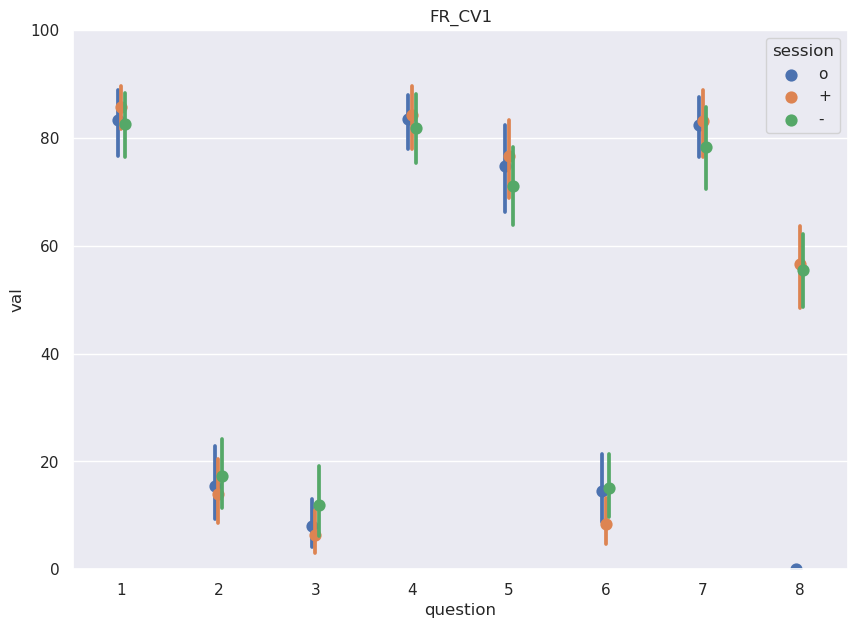

In [ ]:
df_plot = df_q[df_q['cond'] == 'FR_CV1']
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='FR_CV1')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

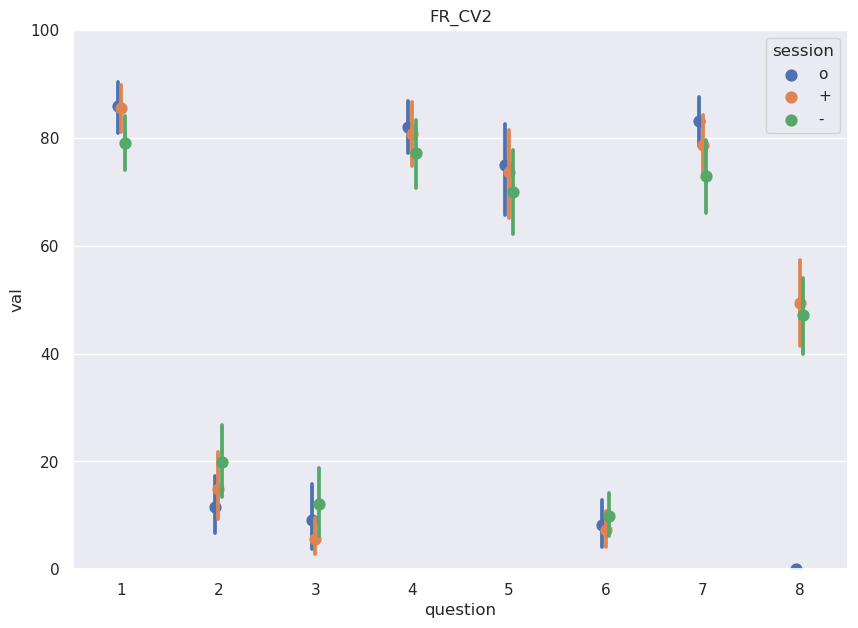

In [ ]:
df_plot = df_q[df_q['cond'] == 'FR_CV2']
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='FR_CV2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

In [ ]:
df_q[df_q['cond'] == 'MECA']['val'].max()

100.0

(0.0, 100.0)

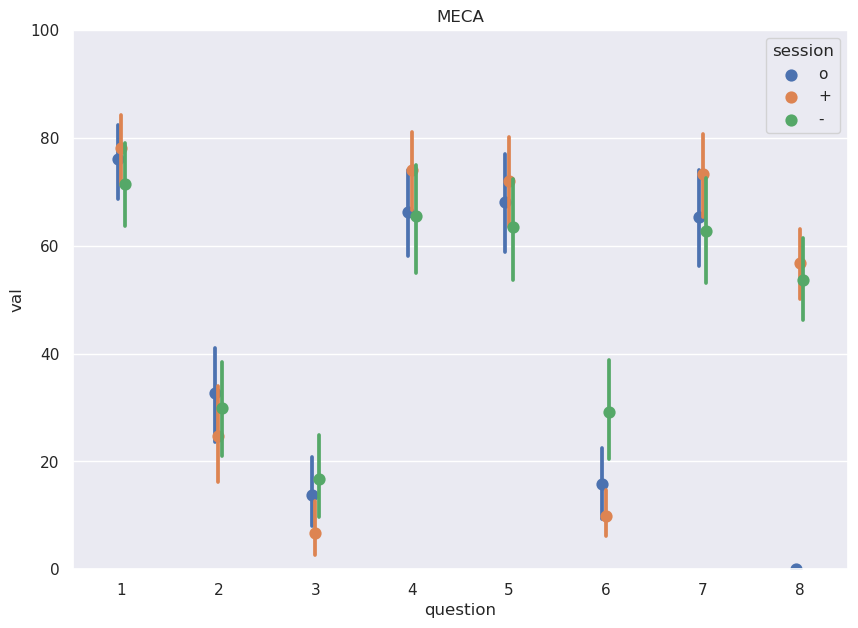

In [ ]:
df_plot = df_q[df_q['cond'] == 'MECA']
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

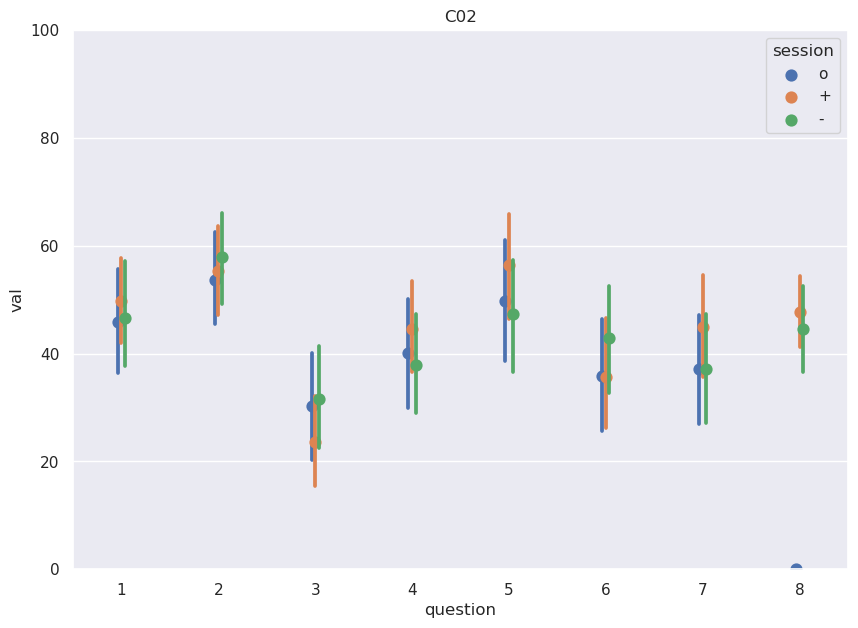

In [ ]:
df_plot = df_q[df_q['cond'] == 'CO2']
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='C02')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

In [ ]:
df_q

,sujet,session,cond,question,raw_val,scale,val
0,PD01,o,FR_CV1,1,6.9,15.9,43.396226
1,PD01,o,FR_CV1,2,9.8,15.9,61.635220
2,PD01,o,FR_CV1,3,9.3,15.9,58.490566
3,PD01,o,FR_CV1,4,6.2,15.9,38.993711
4,PD01,o,FR_CV1,5,7.9,15.9,49.685535
...,...,...,...,...,...,...,...
3163,MA33,-,FR_CV2,4,7.5,15.6,48.076923
3164,MA33,-,FR_CV2,5,0,15.6,0.000000
3165,MA33,-,FR_CV2,6,2.7,15.6,17.307692
3166,MA33,-,FR_CV2,7,7.2,15.6,46.153846


In [ ]:
val = np.zeros((df_q['sujet'].unique().shape[0]*df_q['session'].unique().shape[0]*df_q['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_q['sujet'].unique()):
    for session_i, session in enumerate(df_q['session'].unique()):
        for cond_i, cond in enumerate(df_q['cond'].unique()):
            df_i = df_q.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_p = 300 - df_i[df_i['question'].isin([1, 4, 5])]['val'].sum()
            val_n = df_i[df_i['question'].isin([2, 3, 6])]['val'].sum()
            val_stai = ((val_n + val_p)/600)*100
            val[i, :] = np.array([sujet, session, cond, val_stai])
            i += 1


In [ ]:
df_stai = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'val'])
df_stai['val'] = df_stai['val'].astype(np.float64) 
df_stai

,sujet,session,cond,val
0,PD01,o,FR_CV1,55.765199
1,PD01,o,MECA,69.287212
2,PD01,o,CO2,77.044025
3,PD01,o,FR_CV2,45.702306
4,PD01,+,FR_CV1,44.055202
...,...,...,...,...
391,MA33,+,FR_CV2,17.634409
392,MA33,-,FR_CV1,8.279570
393,MA33,-,MECA,66.774194
394,MA33,-,CO2,63.247863


(0.0, 100.0)

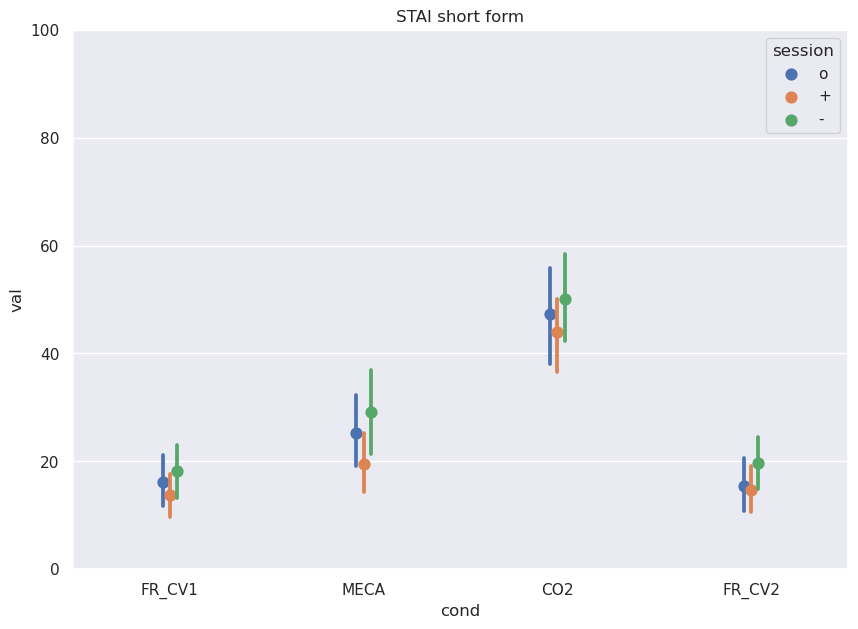

In [ ]:
df_plot = df_stai[df_stai['cond'] == 'FR_CV1']
sns.pointplot(data=df_stai, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='STAI short form')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

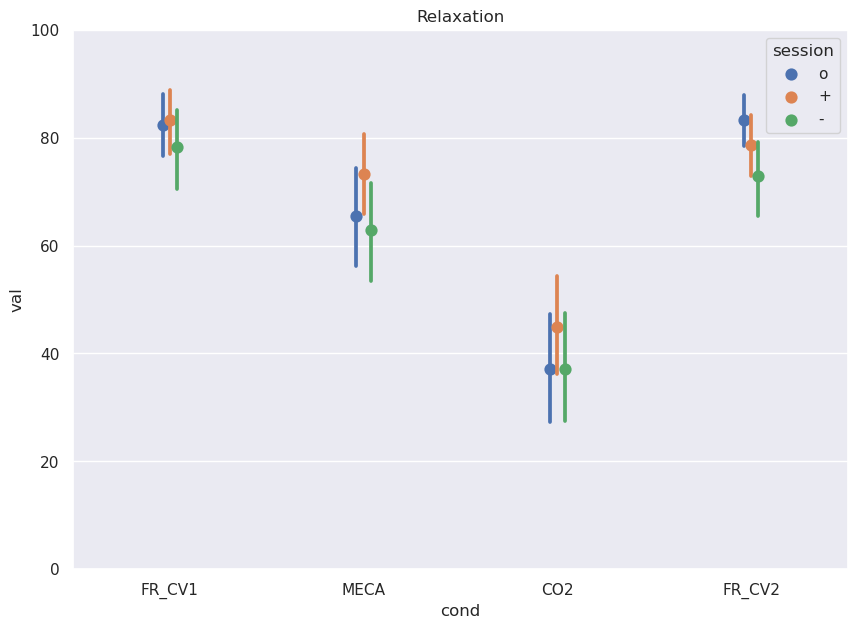

In [ ]:
df_plot = df_q.query("question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

# Filter with intensity

<AxesSubplot:xlabel='val', ylabel='Count'>

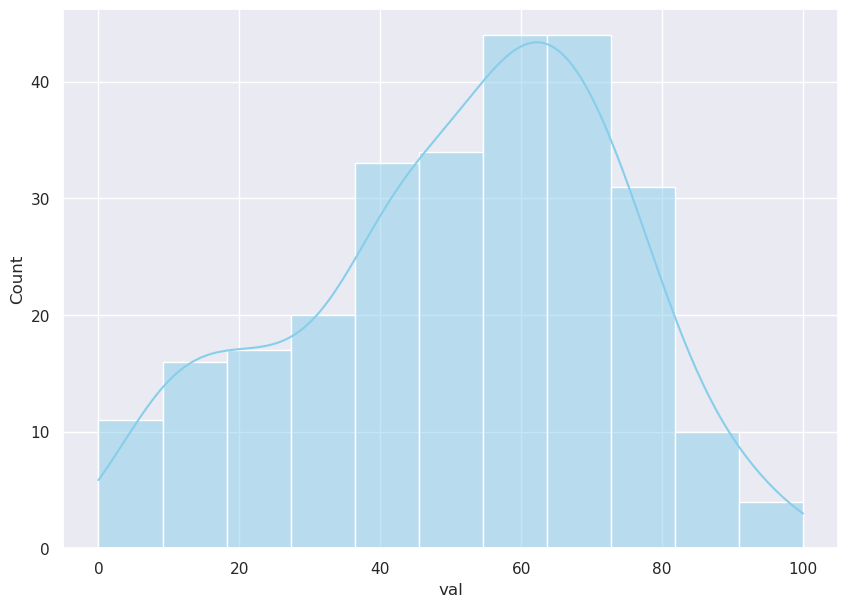

In [ ]:
df_plot = df_q.query("question == 8 & session in ['+', '-']")
sns.histplot(data=df_plot, x="val", label='MECA', color="skyblue", kde=True)

In [ ]:
seuil_odor_p = 30
seuil_odor_n = 50

sujet_p = []
for sujet in df_q['sujet'].unique():
    if (df_q.query(f"sujet == '{sujet}' & question == 8 & session in ['+', '-'] & cond in ['MECA', 'CO2']")['val'].values >= seuil_odor_p).all():
        sujet_p.append(sujet)

sujet_p = np.array(sujet_p)
print(sujet_p)

sujet_n = []
for sujet in df_q['sujet'].unique():
    if (df_q.query(f"sujet == '{sujet}' & question == 8 & session in ['+', '-'] & cond in ['MECA', 'CO2']")['val'].values < seuil_odor_n).all():
        sujet_n.append(sujet)

sujet_n = np.array(sujet_n)
print(sujet_n)

 

['PD01' 'GB04' 'TA09' 'BH10' 'MD14' 'LG15' 'GM16' 'TM19' 'DI22' 'TJ24'
 'DF25' 'MN26' 'BD27' 'NT28' 'AR30' 'MA33']
['MJ02' 'LV05' 'FA11' 'ZV21' 'LF23']


## MDP

(0.0, 10.0)

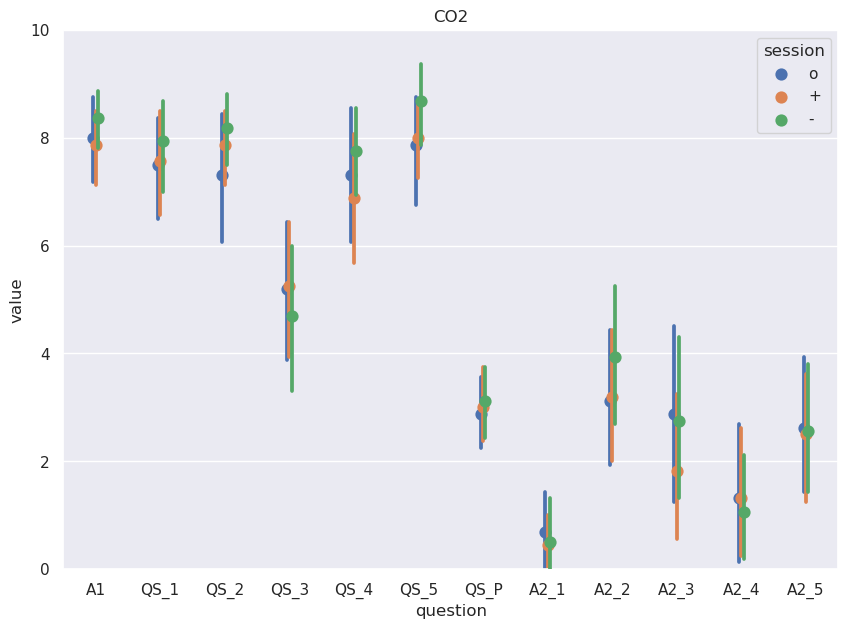

In [ ]:
df_plot = df_mdp.query(f"sujet in {sujet_p.tolist()} & cond == 'CO2'")
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='CO2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

(0.0, 10.0)

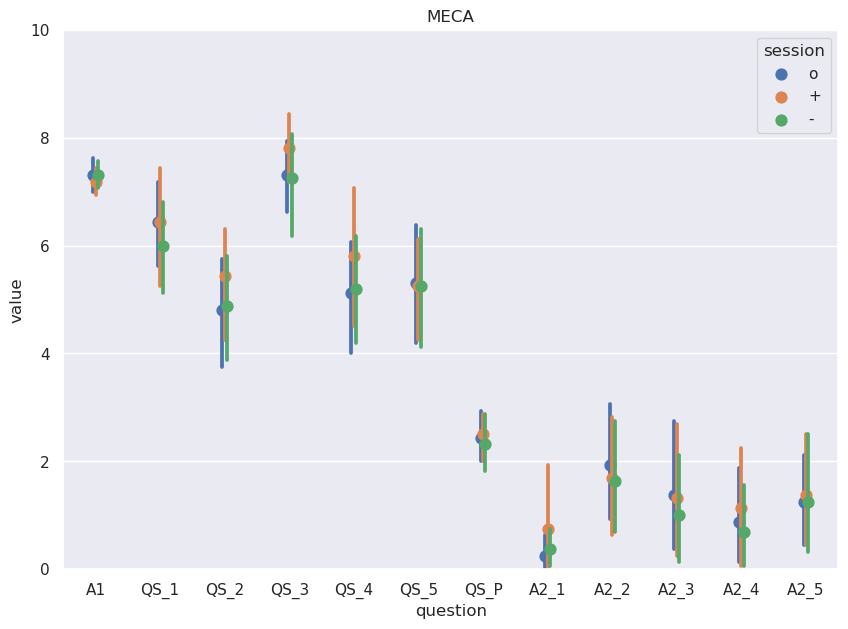

In [ ]:
df_plot = df_mdp.query(f"sujet in {sujet_p.tolist()} & cond == 'MECA'")
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

## Questionnaire

(0.0, 100.0)

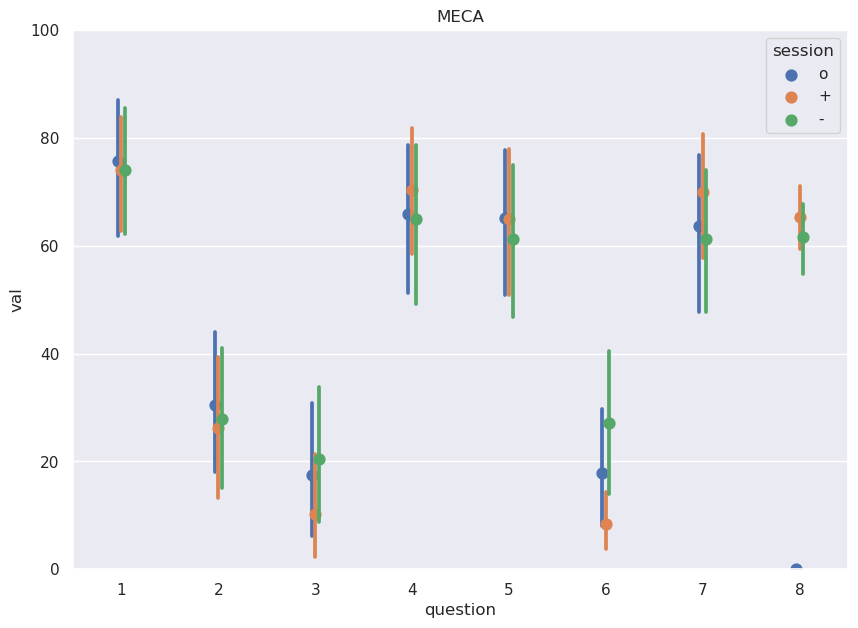

In [ ]:
df_plot = df_q.query(f"sujet in {sujet_p.tolist()} & cond == 'MECA'")
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

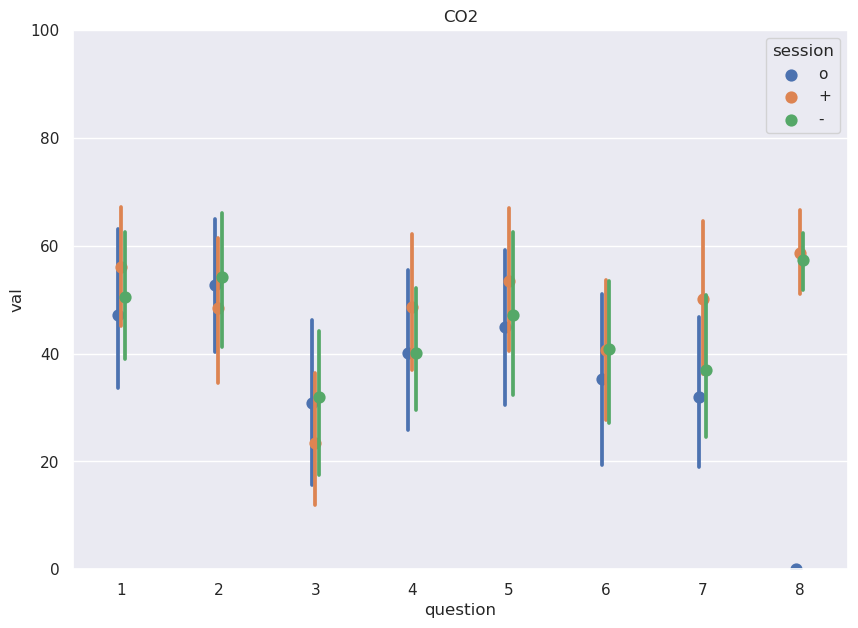

In [ ]:
df_plot = df_q.query(f"sujet in {sujet_p.tolist()} & cond == 'CO2'")
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='CO2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

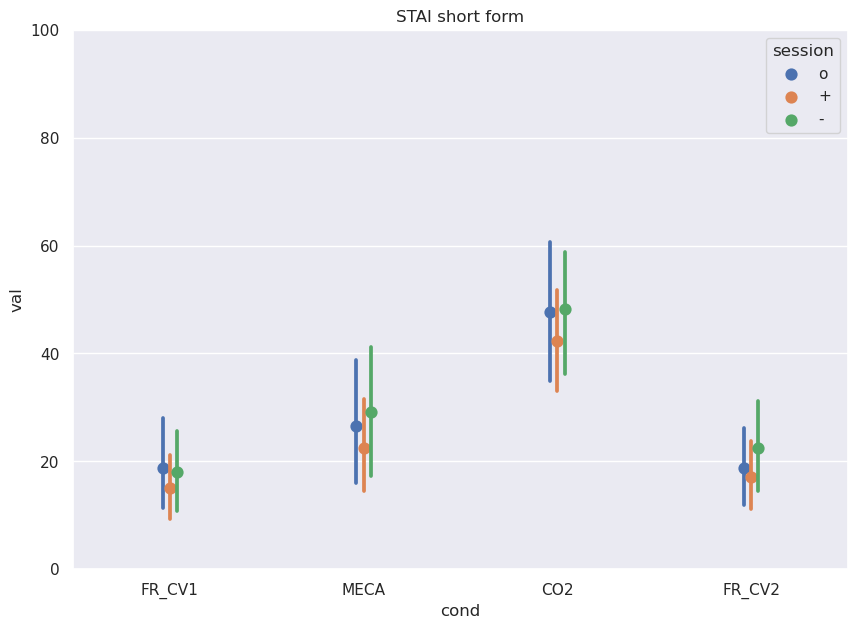

In [ ]:
df_plot = df_stai.query(f"sujet in {sujet_p.tolist()}")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='STAI short form')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

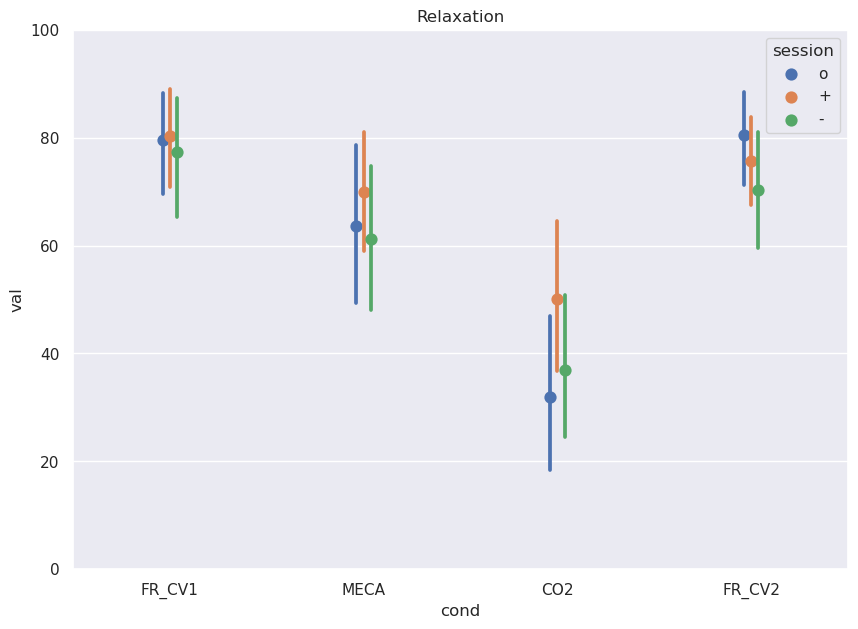

In [ ]:
df_plot = df_q.query(f"sujet in {sujet_p.tolist()} & question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

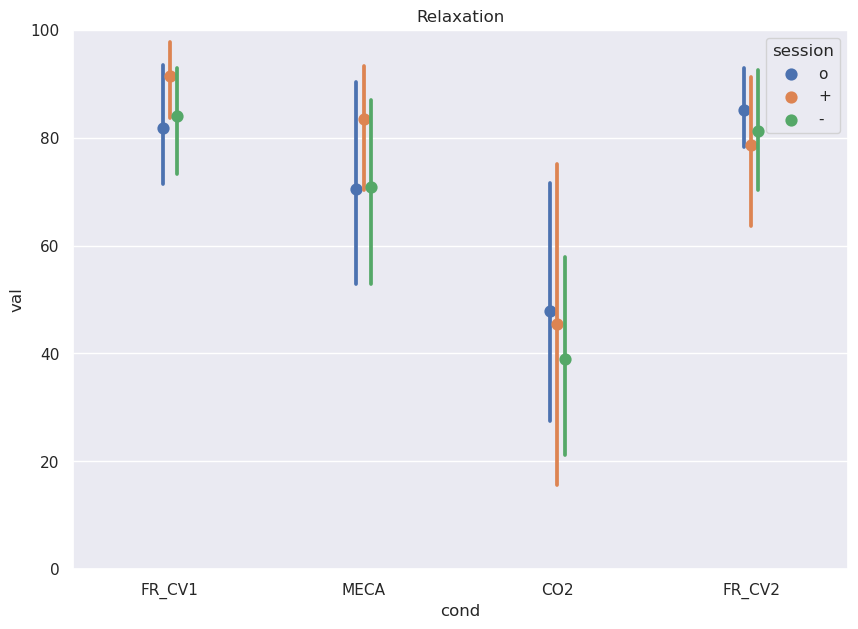

In [ ]:
df_plot = df_q.query(f"sujet in {sujet_n.tolist()} & question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

# Filter with best sujet

In [1]:
diff_val = 60
evoc_val = 60

sujet_sel_diff = df_diff.query(f"value >= {diff_val}")['sujet'].values
sujet_sel_evoc = df_odor_profile_filtered_p.query(f"question == 'evocation' & value >= {evoc_val}")['sujet'].unique()
sujet_sel_best = []
for sujet in sujet_sel_diff:
    if sujet in sujet_sel_evoc:
        sujet_sel_best.append(sujet)
sujet_sel_best = np.array(sujet_sel_best)
sujet_sel_best

NameError: name 'df_diff' is not defined

## MDP

(0.0, 10.0)

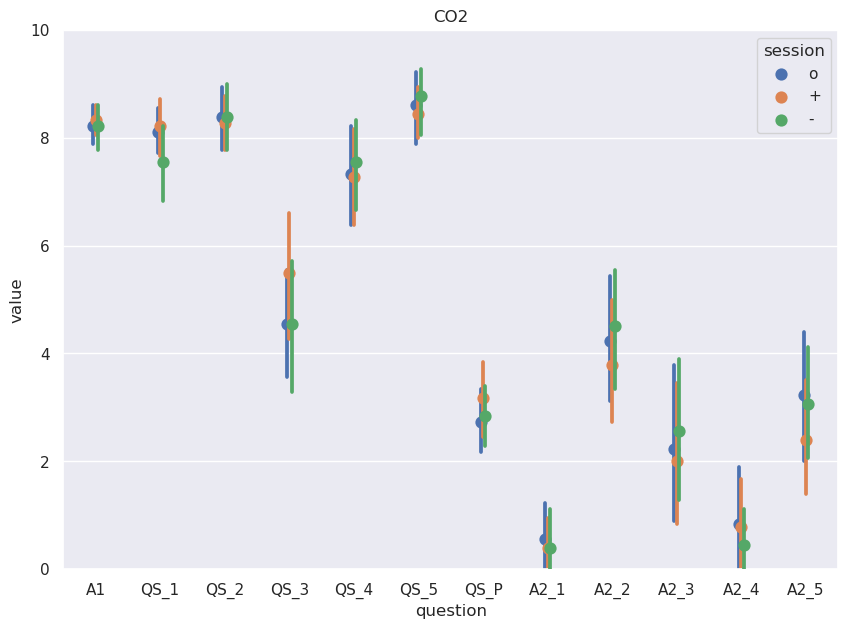

In [329]:
df_plot = df_mdp.query(f"sujet in {sujet_sel_best.tolist()} & cond == 'CO2'")
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='CO2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

(0.0, 10.0)

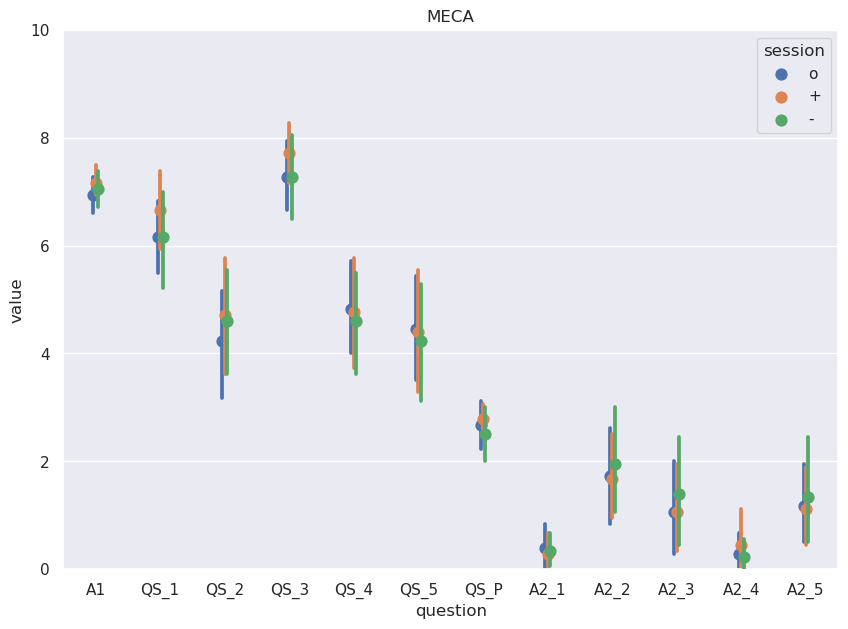

In [330]:
df_plot = df_mdp.query(f"sujet in {sujet_sel_best.tolist()} & cond == 'MECA'")
sns.pointplot(data=df_plot, x="question", y="value", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 10)

## Questionnaire

(0.0, 100.0)

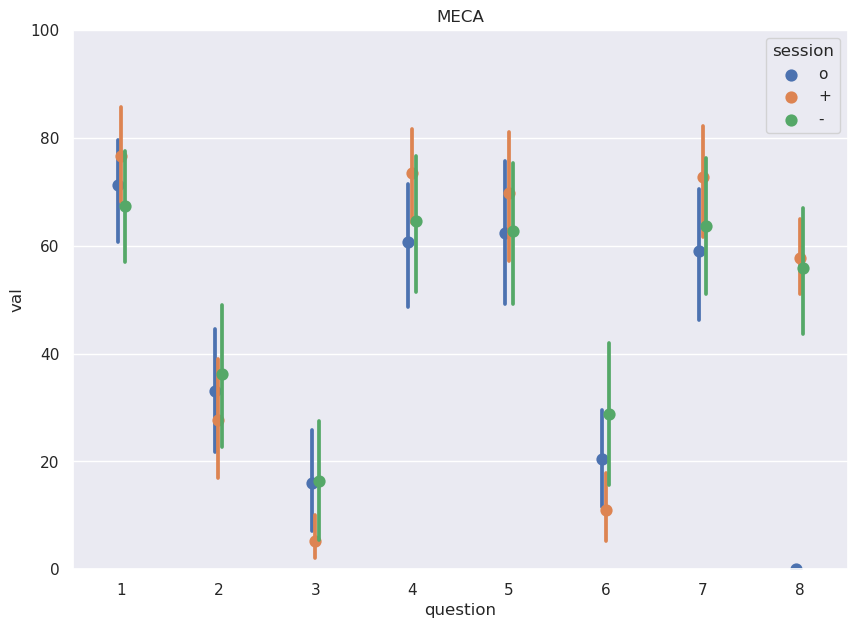

In [331]:
df_plot = df_q.query(f"sujet in {sujet_sel_best.tolist()} & cond == 'MECA'")
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='MECA')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

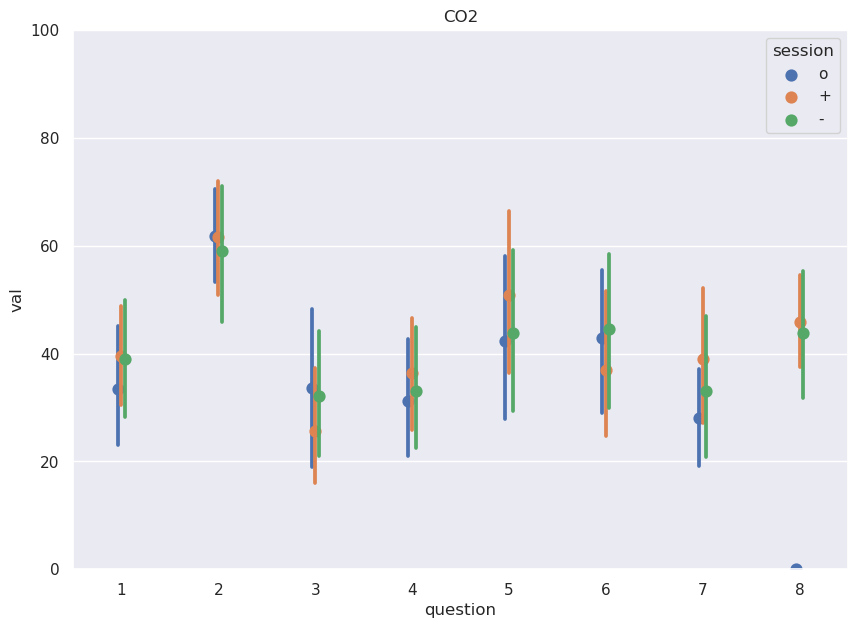

In [332]:
df_plot = df_q.query(f"sujet in {sujet_sel_best.tolist()} & cond == 'CO2'")
sns.pointplot(data=df_plot, x="question", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='CO2')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

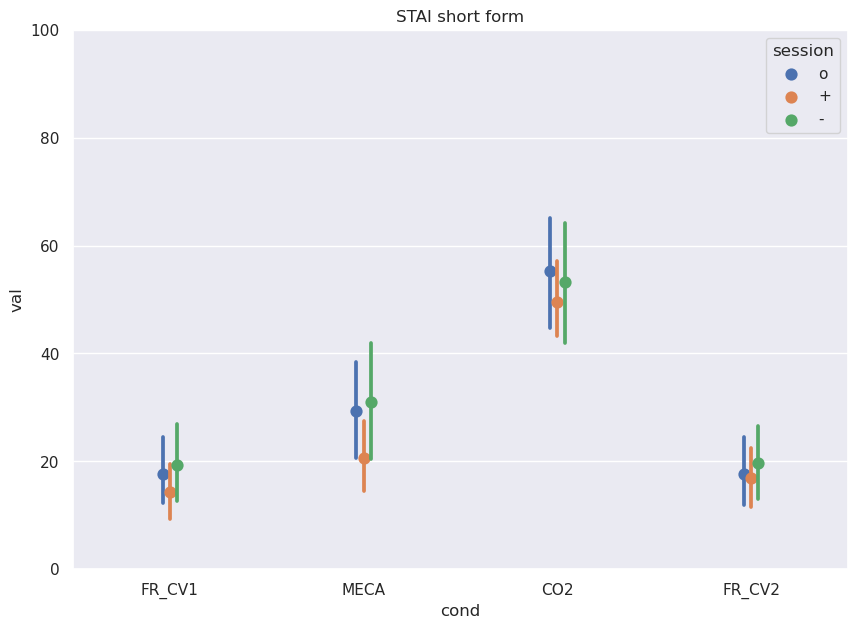

In [333]:
df_plot = df_stai.query(f"sujet in {sujet_sel_best.tolist()}")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='STAI short form')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

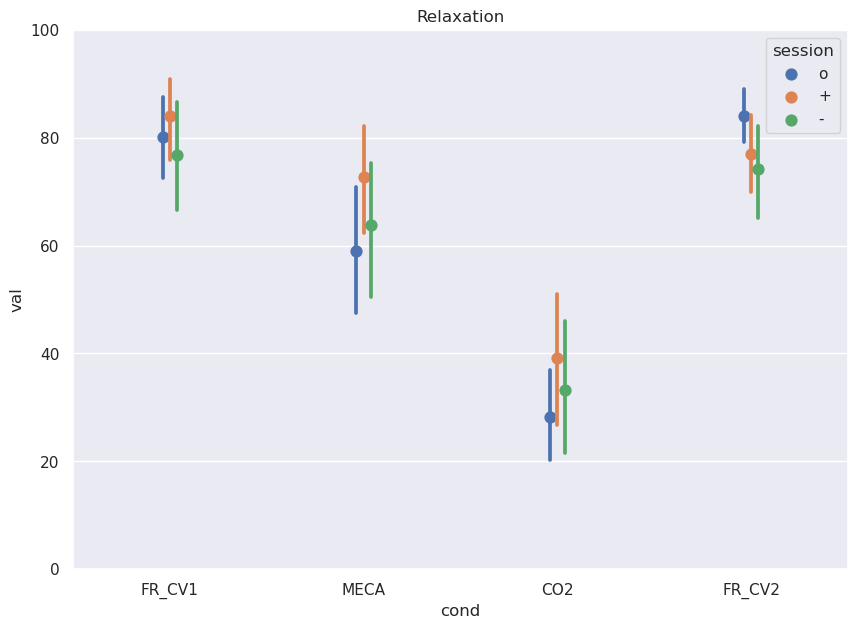

In [334]:
df_plot = df_q.query(f"sujet in {sujet_sel_best.tolist()} & question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

(0.0, 100.0)

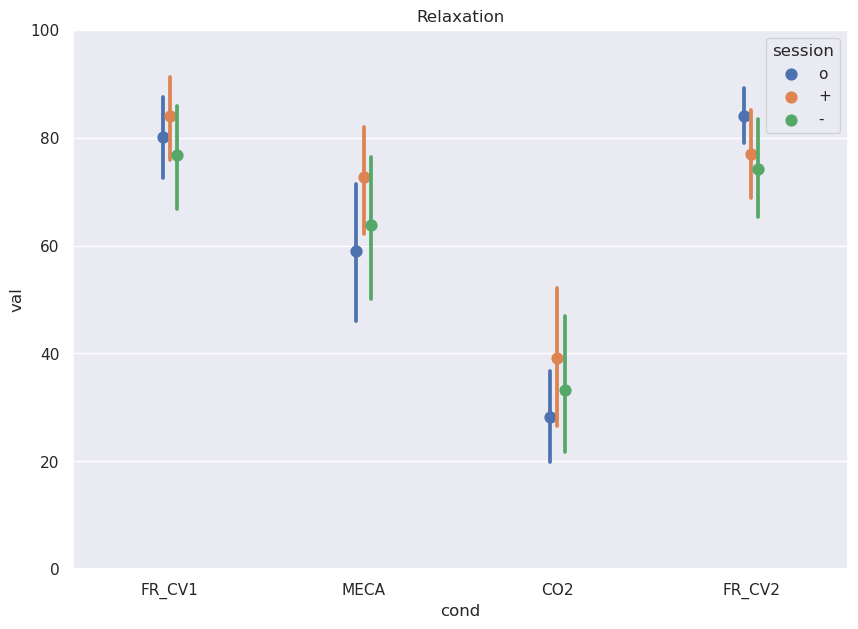

In [335]:
df_plot = df_q.query(f"sujet in {sujet_sel_best.tolist()} & question == 7")
sns.pointplot(data=df_plot, x="cond", y="val", hue="session", errorbar='sd', linestyles='none', dodge=True).set(title='Relaxation')
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(0, 100)

# Correlation Intensity Relaxation 

In [336]:
df_ri = df_q.query("question == 7 & cond in ['MECA', 'CO2'] & session in ['+', '-']")
df_ri['intensity'] = df_q.query("question == 8 & cond in ['MECA', 'CO2'] & session in ['+', '-']")['val'].values
df_ri

/tmp/ipykernel_1121102/3049950964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ri['intensity'] = df_q.query("question == 8 & cond in ['MECA', 'CO2'] & session in ['+', '-']")['val'].values


,sujet,session,cond,question,raw_val,scale,val,intensity
46,PD01,+,MECA,7,4.7,15.7,29.936306,68.152866
54,PD01,+,CO2,7,2,15.7,12.738854,53.503185
78,PD01,-,MECA,7,5.5,15.7,35.031847,82.165605
86,PD01,-,CO2,7,3,15.7,19.108280,72.611465
142,MJ02,+,MECA,7,14,15.7,89.171975,9.554140
...,...,...,...,...,...,...,...,...
3062,CM32,-,CO2,7,0.1,15.6,0.641026,20.512821
3118,MA33,+,MECA,7,13.7,15.3,89.542484,81.699346
3126,MA33,+,CO2,7,13.8,15.5,89.032258,38.064516
3150,MA33,-,MECA,7,5,15.5,32.258065,70.967742


[Text(0.5, 1.0, 'MECA relaxation')]

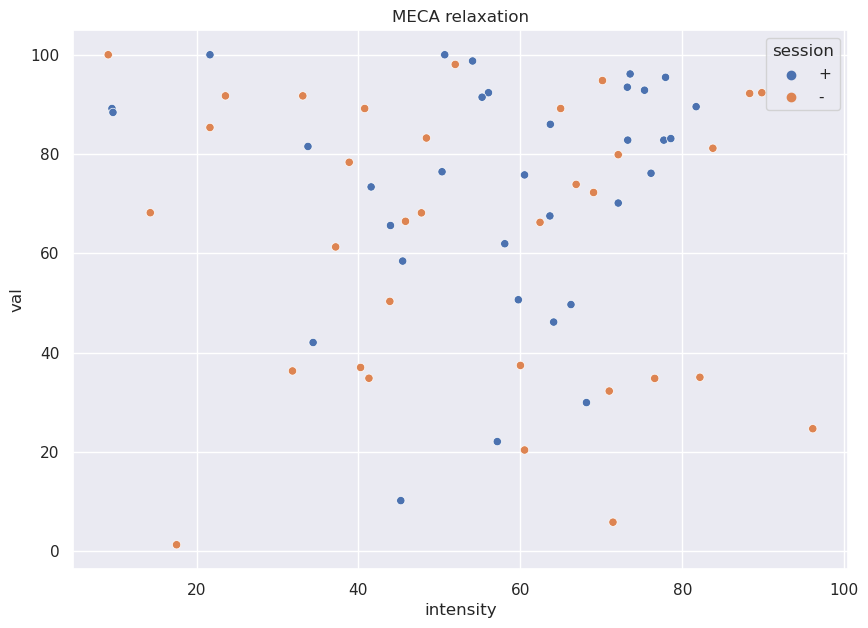

In [337]:
df_plot = df_ri.query("cond == 'MECA'")
sns.scatterplot(data=df_plot, x='intensity', y='val', hue='session').set(title='MECA relaxation')


[Text(0.5, 1.0, 'CO2 relaxation')]

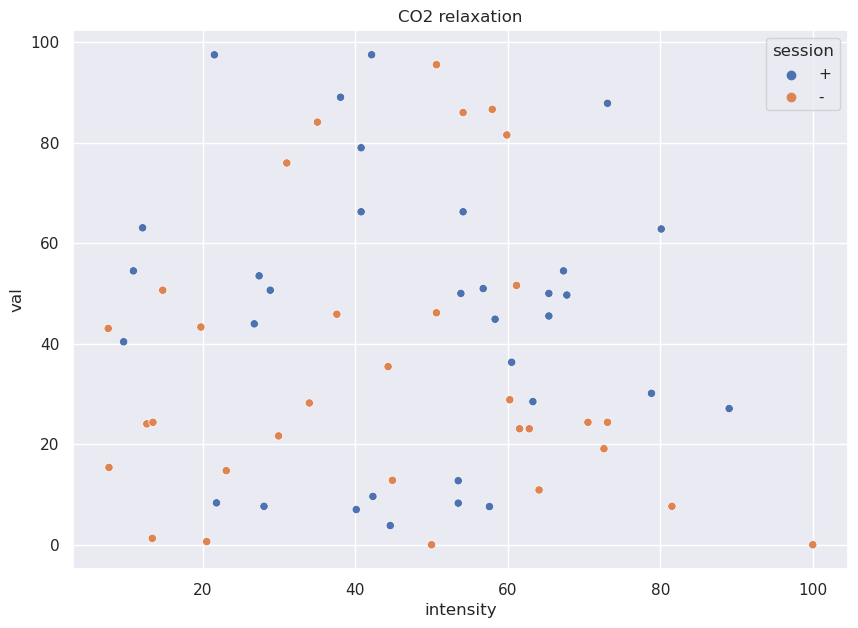

In [338]:
df_plot = df_ri.query("cond == 'CO2'")
sns.scatterplot(data=df_plot, x='intensity', y='val', hue='session').set(title='CO2 relaxation')

In [339]:
df_stai_ri = df_stai.query("cond in ['MECA', 'CO2'] & session in ['+', '-']")

In [340]:
df_stai_ri['intensity'] = df_q.query("question == 8 & cond in ['MECA', 'CO2'] & session in ['+', '-']")['val'].values
df_stai_ri

/tmp/ipykernel_1121102/2127589661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stai_ri['intensity'] = df_q.query("question == 8 & cond in ['MECA', 'CO2'] & session in ['+', '-']")['val'].values


,sujet,session,cond,val,intensity
5,PD01,+,MECA,71.337580,68.152866
6,PD01,+,CO2,78.025478,53.503185
9,PD01,-,MECA,67.834395,82.165605
10,PD01,-,CO2,74.628450,72.611465
17,MJ02,+,MECA,12.101911,9.554140
...,...,...,...,...,...
382,CM32,-,CO2,85.897436,20.512821
389,MA33,+,MECA,19.063181,81.699346
390,MA33,+,CO2,34.623656,38.064516
393,MA33,-,MECA,66.774194,70.967742


[Text(0.5, 1.0, 'MECA STAI')]

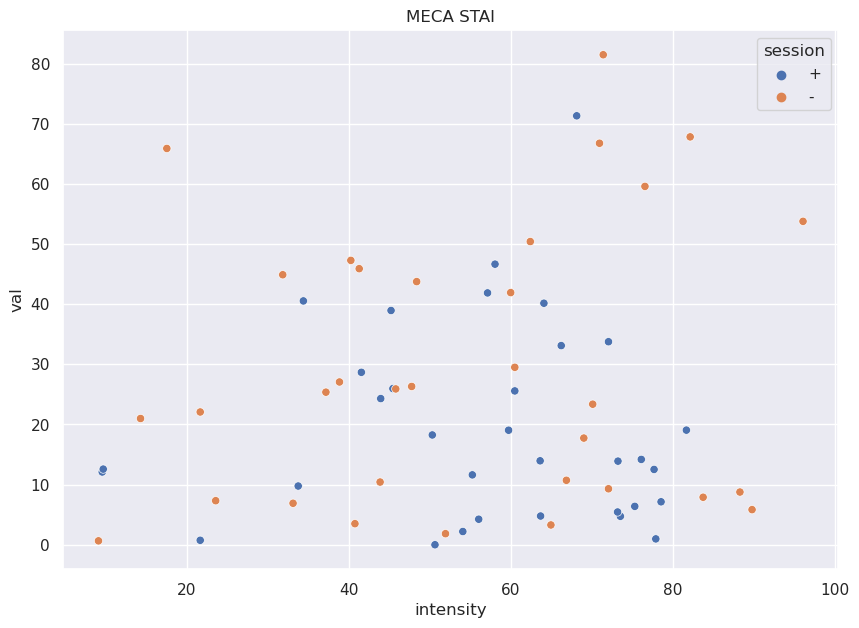

In [341]:
df_plot = df_stai_ri.query("cond == 'MECA'")
sns.scatterplot(data=df_plot, x='intensity', y='val', hue='session').set(title='MECA STAI')


[Text(0.5, 1.0, 'CO2 STAI')]

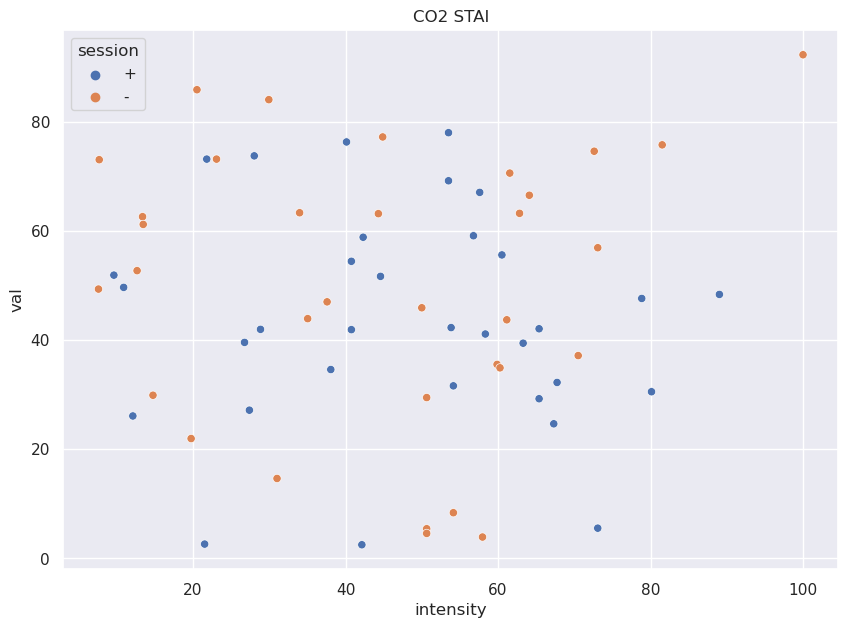

In [342]:
df_plot = df_stai_ri.query("cond == 'CO2'")
sns.scatterplot(data=df_plot, x='intensity', y='val', hue='session').set(title='CO2 STAI')

# Compute diff

In [5]:
val = np.zeros((df_mdp['sujet'].unique().shape[0]*df_mdp['session'].unique().shape[0]*df_mdp['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_mdp['sujet'].unique()):
    for session_i, session in enumerate(df_mdp['session'].unique()):
        for cond_i, cond in enumerate(df_mdp['cond'].unique()):
            df_i = df_mdp.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_A2 = df_i[df_i['question'].isin(['A2_1', 'A2_2', 'A2_3', 'A2_4', 'A2_5'])]['value'].sum()
            val[i, :] = np.array([sujet, session, cond, val_A2])
            i += 1

df_A2 = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'value'])
df_A2['value'] = df_A2['value'].astype(np.float64) 
df_A2

,sujet,session,cond,value
0,PD01,o,MECA,26.0
1,PD01,o,CO2,34.0
2,PD01,+,MECA,40.0
3,PD01,+,CO2,32.0
4,PD01,-,MECA,27.0
...,...,...,...,...
193,MA33,o,CO2,21.0
194,MA33,+,MECA,2.0
195,MA33,+,CO2,7.0
196,MA33,-,MECA,1.0


In [6]:
val = np.zeros((df_q['sujet'].unique().shape[0]*df_q['session'].unique().shape[0]*df_q['cond'].unique().shape[0], 4), dtype='object')
i = 0
for sujet_i, sujet in enumerate(df_q['sujet'].unique()):
    for session_i, session in enumerate(df_q['session'].unique()):
        for cond_i, cond in enumerate(df_q['cond'].unique()):
            df_i = df_q.query(f"sujet == '{sujet}' & session == '{session}' & cond == '{cond}'")
            val_p = 300 - df_i[df_i['question'].isin([1, 4, 5])]['val'].sum()
            val_n = df_i[df_i['question'].isin([2, 3, 6])]['val'].sum()
            val_stai = ((val_n + val_p)/600)*100
            val[i, :] = np.array([sujet, session, cond, val_stai])
            i += 1
df_stai = pd.DataFrame(val, columns=['sujet', 'session', 'cond', 'val'])
df_stai['val'] = df_stai['val'].astype(np.float64) 
df_stai

,sujet,session,cond,val
0,PD01,o,FR_CV1,55.765199
1,PD01,o,MECA,69.287212
2,PD01,o,CO2,77.044025
3,PD01,o,FR_CV2,45.702306
4,PD01,+,FR_CV1,44.055202
...,...,...,...,...
391,MA33,+,FR_CV2,17.634409
392,MA33,-,FR_CV1,8.279570
393,MA33,-,MECA,66.774194
394,MA33,-,CO2,63.247863


In [12]:
df_rela = df_q.query(f"question == 7").drop(['question', 'raw_val', 'scale'], axis=1)
df_rela

,sujet,session,cond,val
6,PD01,o,FR_CV1,45.283019
14,PD01,o,MECA,16.981132
22,PD01,o,CO2,13.207547
30,PD01,o,FR_CV2,60.377358
38,PD01,+,FR_CV1,53.503185
...,...,...,...,...
3134,MA33,+,FR_CV2,90.322581
3142,MA33,-,FR_CV1,100.000000
3150,MA33,-,MECA,32.258065
3158,MA33,-,CO2,23.076923


In [62]:
diff_i = df_A2.query(f"sujet == '{sujet}' & cond == 'MECA' & session == '+'")['value'].values[0] / df_A2.query(f"sujet == '{sujet}' & cond == 'MECA' & session == '-'")['value'].values[0]
diff_i

2.0

In [77]:
df_diff = {'sujet' : [], 'diff' : [], 'cond' : [], 'question' : [], 'val' : []}
for sujet in sujet_list:
    for diff_cond in ['+/o', '-/o', '+/-']:
        for cond in ['FR_CV1', 'MECA', 'CO2', 'FR_CV2']:
            for question in ['A2', 'STAI', 'RELAX']:

                diff_cond_a, diff_cond_b = diff_cond.split('/')[0], diff_cond.split('/')[-1]
            
                if question == 'A2' and cond.find('FR_CV') == -1:
                    diff_i = df_A2.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_a}'")['value'].values[0] - df_A2.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_b}'")['value'].values[0]
                if question == 'STAI':
                    diff_i = df_stai.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_a}'")['val'].values[0] - df_stai.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_b}'")['val'].values[0]
                if question == 'RELAX':
                    diff_i = df_rela.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_a}'")['val'].values[0] - df_rela.query(f"sujet == '{sujet}' & cond == '{cond}' & session == '{diff_cond_b}'")['val'].values[0]

                df_diff['sujet'].append(sujet)
                df_diff['diff'].append(diff_cond)
                df_diff['cond'].append(cond)
                df_diff['question'].append(question)
                df_diff['val'].append(diff_i)

df_diff = pd.DataFrame(df_diff)
df_diff

,sujet,diff,cond,question,val
0,PD01,+/o,FR_CV1,A2,1.978656
1,PD01,+/o,FR_CV1,STAI,-11.709997
2,PD01,+/o,FR_CV1,RELAX,8.220166
3,PD01,+/o,MECA,A2,14.000000
4,PD01,+/o,MECA,STAI,2.050368
...,...,...,...,...,...
1183,MA33,+/-,CO2,STAI,-28.624207
1184,MA33,+/-,CO2,RELAX,65.955335
1185,MA33,+/-,FR_CV2,A2,65.955335
1186,MA33,+/-,FR_CV2,STAI,-24.459608


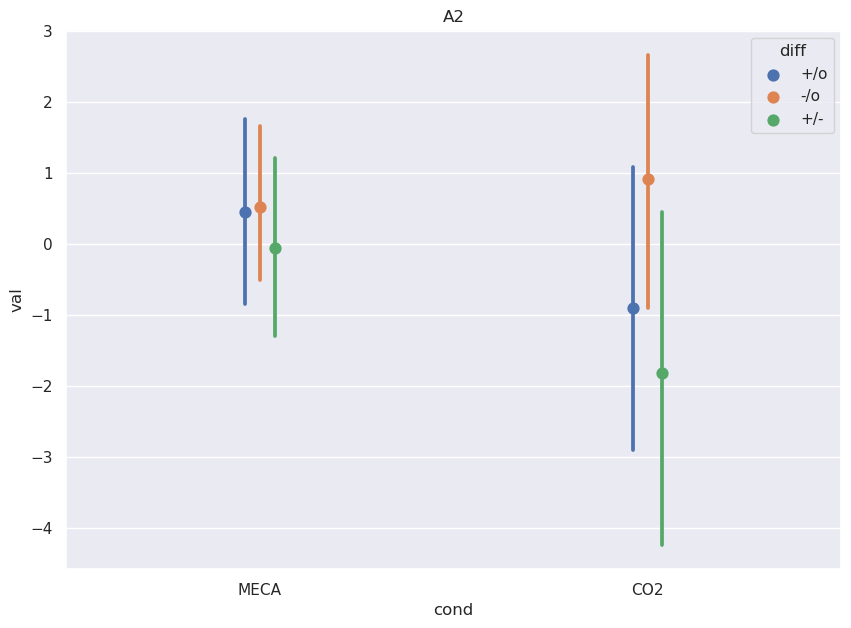

In [78]:
df_plot = df_diff.query(f"question == 'A2' & cond in ['MECA', 'CO2']")
sns.pointplot(data=df_plot, x="cond", y="val", hue="diff", errorbar='sd', linestyles='none', dodge=True).set(title='A2')
sns.set(rc={'figure.figsize':(10,7)})


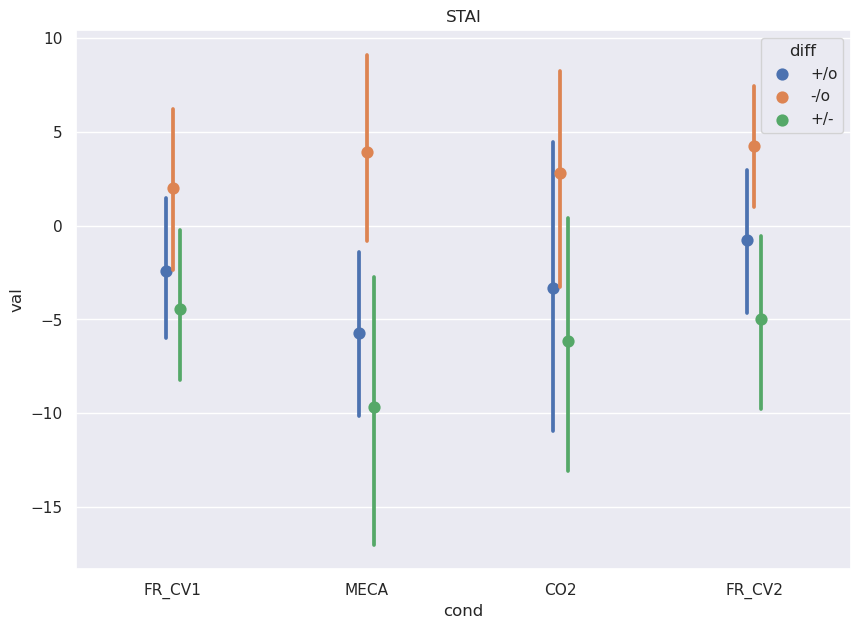

In [79]:
df_plot = df_diff.query(f"question == 'STAI'")
sns.pointplot(data=df_plot, x="cond", y="val", hue="diff", errorbar='sd', linestyles='none', dodge=True).set(title='STAI')
sns.set(rc={'figure.figsize':(10,7)})

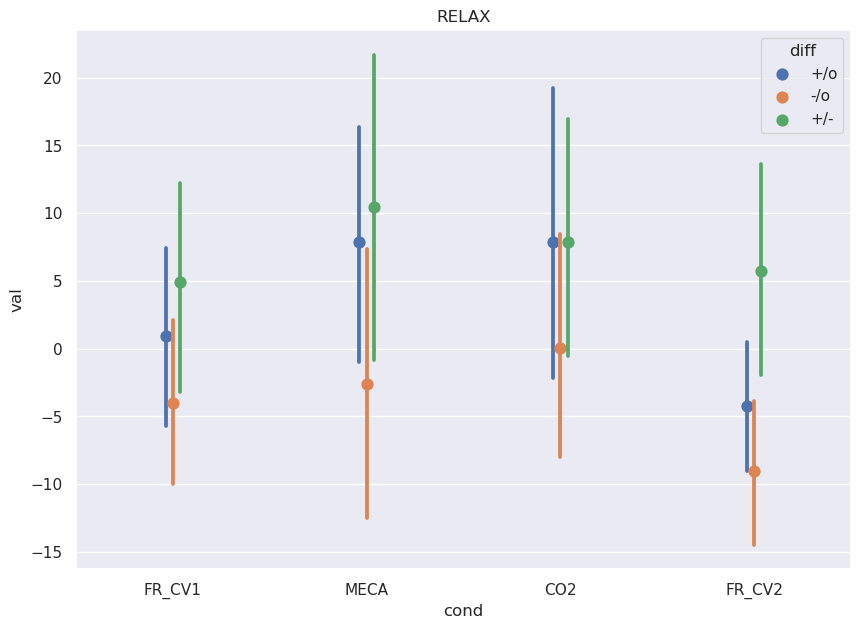

In [80]:
df_plot = df_diff.query(f"question == 'RELAX'")
sns.pointplot(data=df_plot, x="cond", y="val", hue="diff", errorbar='sd', linestyles='none', dodge=True).set(title='RELAX')
sns.set(rc={'figure.figsize':(10,7)})

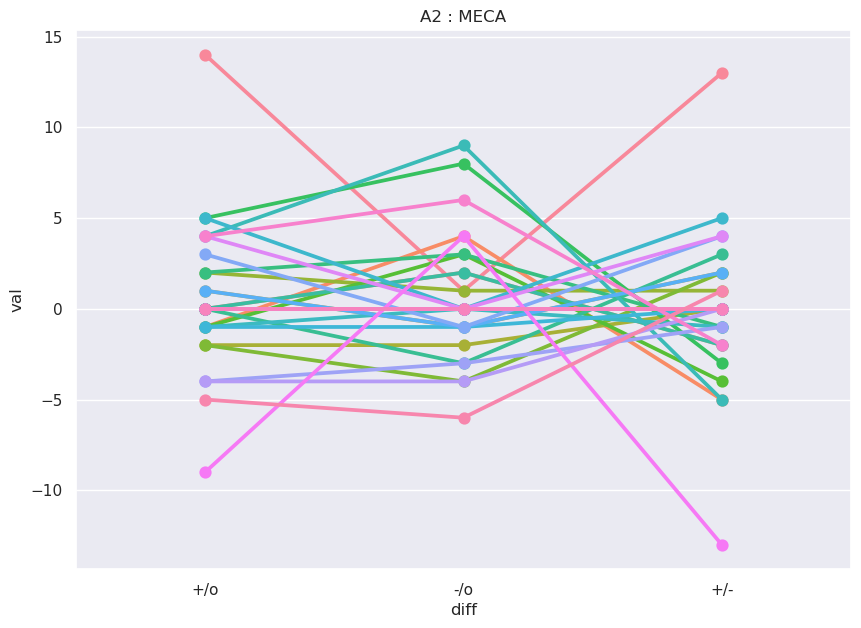

In [114]:
cond = 'MECA'
df_plot = df_diff.query(f"question == 'A2' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'A2 : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

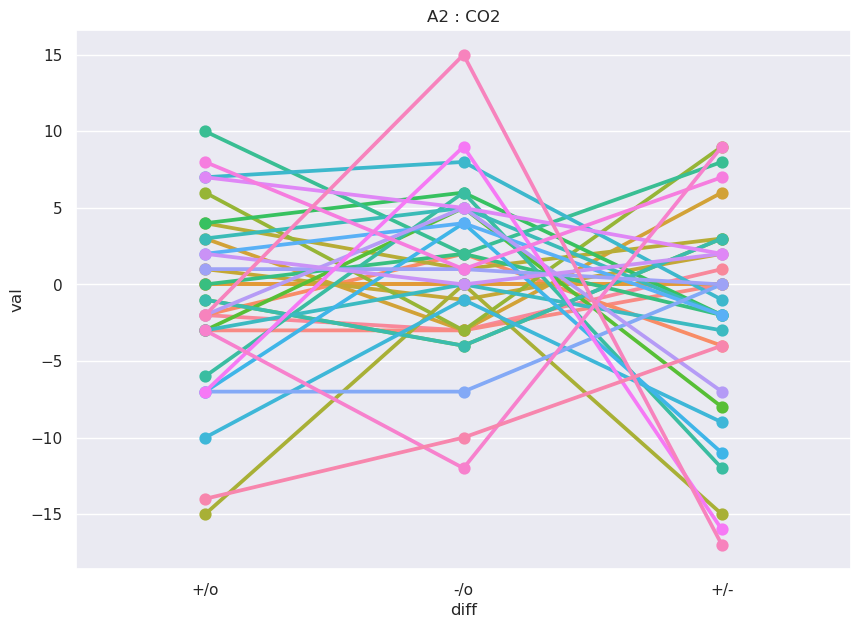

In [115]:
cond = 'CO2'
df_plot = df_diff.query(f"question == 'A2' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'A2 : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

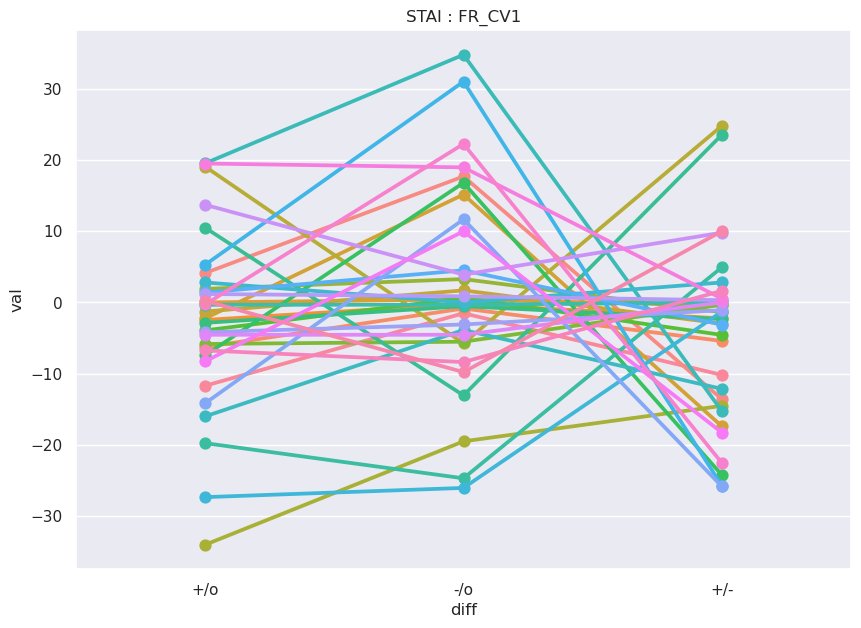

In [116]:
cond = 'FR_CV1'
df_plot = df_diff.query(f"question == 'STAI' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'STAI : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

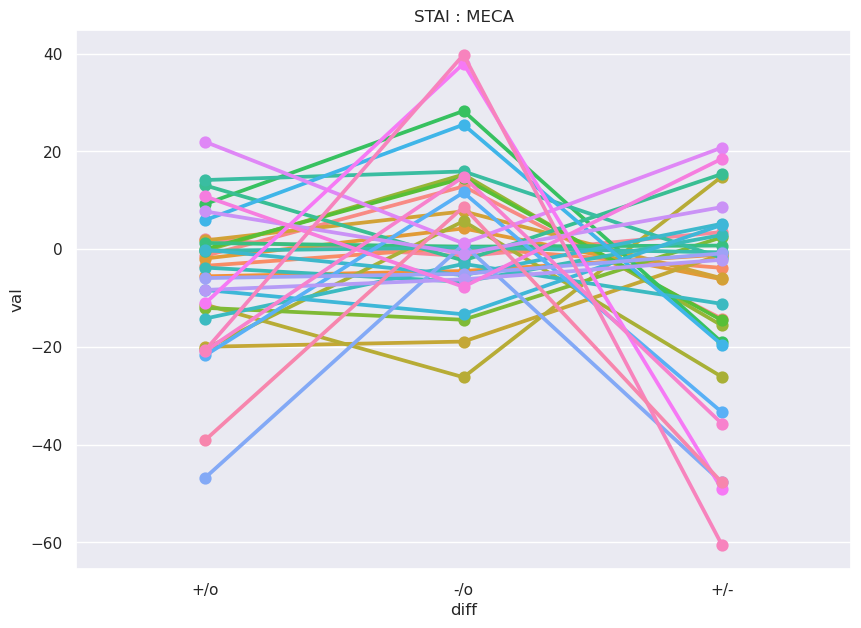

In [117]:
cond = 'MECA'
df_plot = df_diff.query(f"question == 'STAI' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'STAI : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

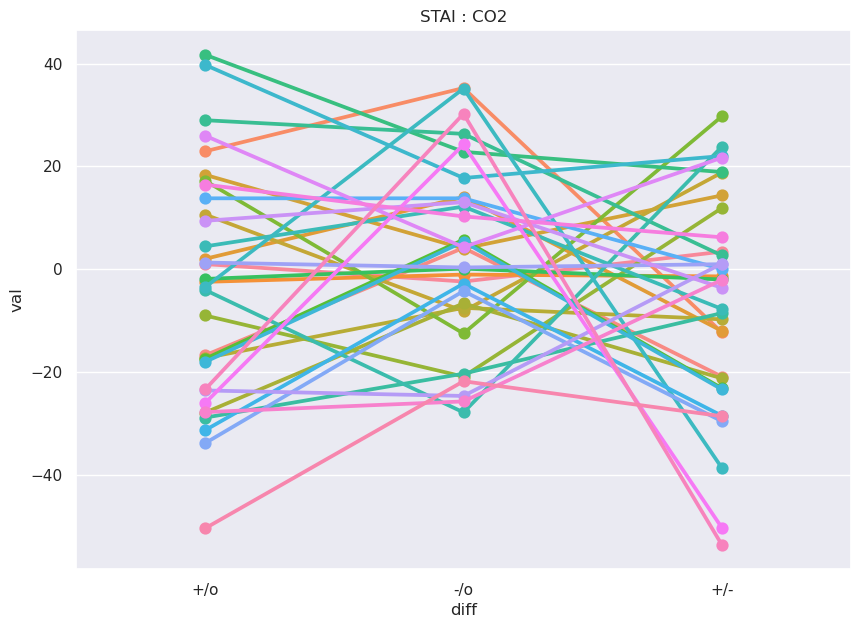

In [118]:
cond = 'CO2'
df_plot = df_diff.query(f"question == 'STAI' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'STAI : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

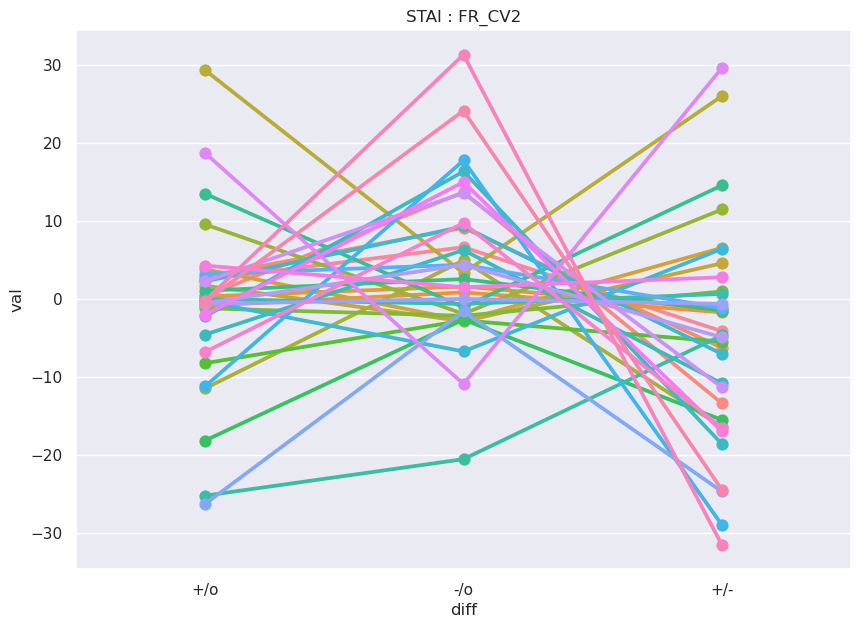

In [119]:
cond = 'FR_CV2'
df_plot = df_diff.query(f"question == 'STAI' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'STAI : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

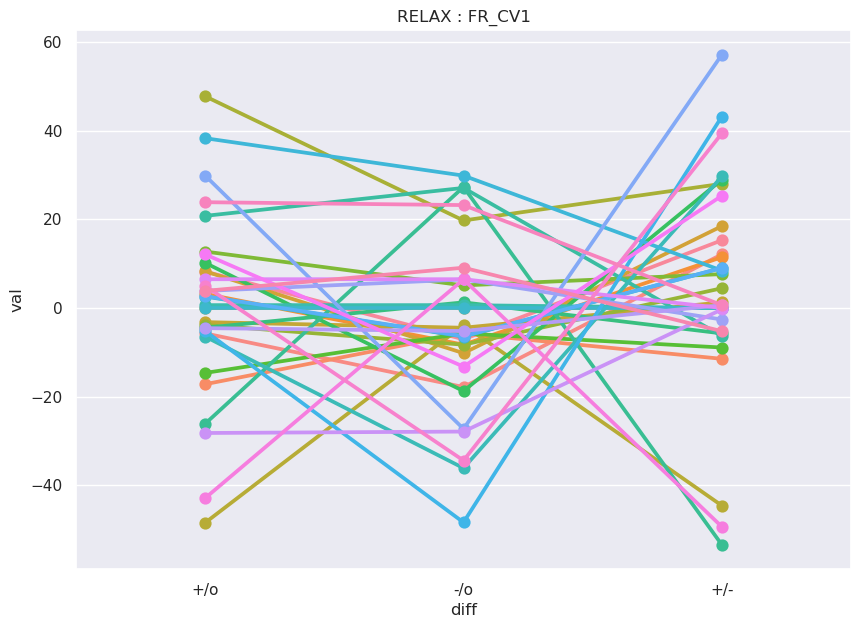

In [120]:
cond = 'FR_CV1'
df_plot = df_diff.query(f"question == 'RELAX' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'RELAX : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

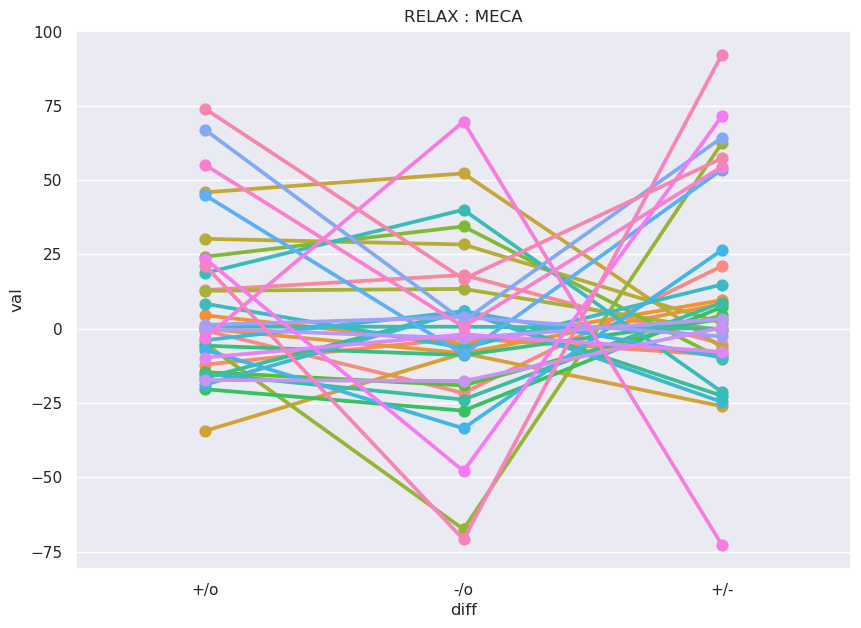

In [121]:
cond = 'MECA'
df_plot = df_diff.query(f"question == 'RELAX' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'RELAX : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

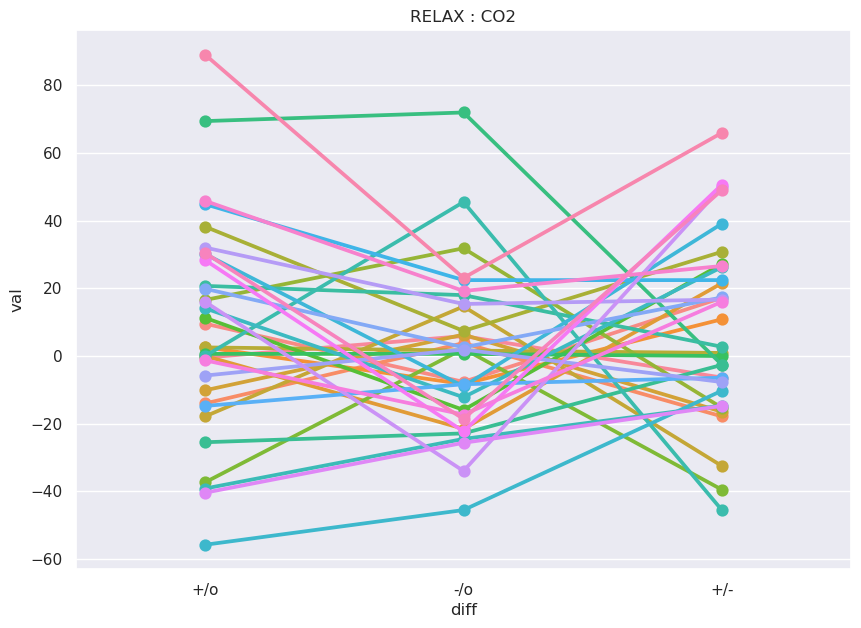

In [122]:
cond = 'CO2'
df_plot = df_diff.query(f"question == 'RELAX' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'RELAX : {cond}')
sns.set(rc={'figure.figsize':(10,7)})

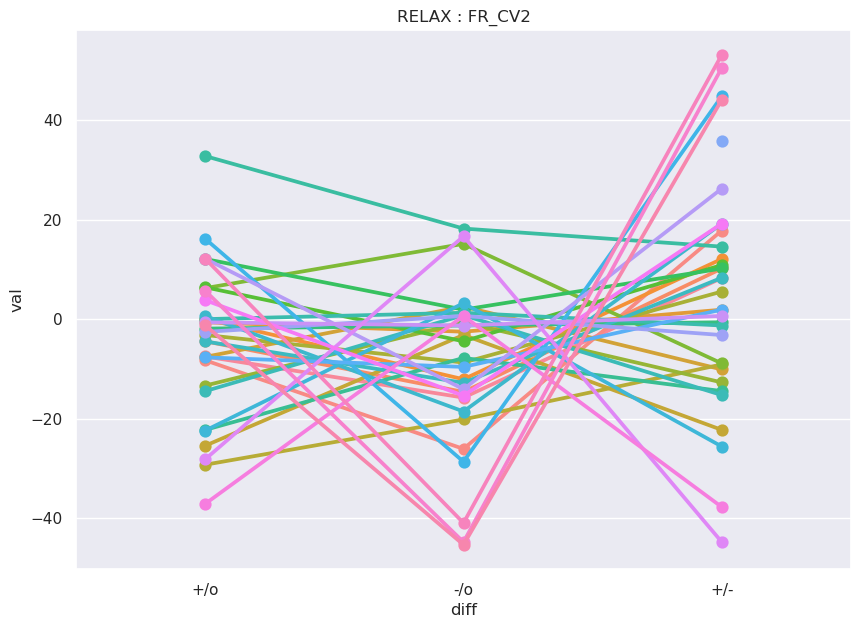

In [123]:
cond = 'FR_CV2'
df_plot = df_diff.query(f"question == 'RELAX' & cond == '{cond}'")
sns.pointplot(data=df_plot, x="diff", y="val", hue="sujet")
plt.legend([],[], frameon=False)
plt.title(f'RELAX : {cond}')
sns.set(rc={'figure.figsize':(10,7)})